Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
#importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Dataset.
data=pd.read_csv('database_IND.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# To check the Datashape.
data.shape

(907, 27)

In [5]:
# we have 907 rows and 27 columns.

In [6]:
# To Check the Datashape information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
# as per this lot of null values are present.
# we have 15 float(values)
# we have 12 object (values).

In [8]:
# To Check the Columns name.
data.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
# Information about columns:
# country- three letter code of the different countries.
# country-long- Full country name.
# Name-Powerplant Name is given.
# gppd-idnr(10-12 character identifier of the powerplant)
# capacity-mgw-electricity generation in the megawatt.
# latitude- geolocation in decimal degrees.
# longitude-geolocation in decimal degrees.
# primaryfuel- is the primary sourced used for electricity generation.(our Output variable)
# otherfuel1,otherfuel 2,other fuel3  are the other sources used in the electricity generation.
# commissioning _year: The Year plant came in operation.
# Owner-Majority shareholder of the powerplant.
# Source-entity reporting  the data.
# Url-web document corresponding to the source field.
# geolocation source- attribution for geolocation information.
# Wepp-id-unique powerplant identifier.
# yearof capacity-year the capacity information was informed.
# generation_gwh_2013-electricity generation in mg watts in the year 2013
# generation_gwh-2014-electricity generation in mg watts in the year 2014.
# generation_gwh-2015 to 2019-electricity generation in mg watts in the year 2019.
# generation_data_source- generation data source.
# estimated_generation_gwh=estimated electricity generated.(Our Target Variable)





# Data intergrity Check

In [10]:

# To Check Null Values.

data.isnull().sum()           # These are Null values  present in the Dataset(in Each Column)

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [11]:
data.isnull().sum().sum()  # Total we have 10445 Null values in the Dataset.

10445

In [12]:
# To check for widespace,special characters in the Dataset.

In [13]:
data.isin(['NA','n/a','-',',','?',' ']).any().sum()

0

In [14]:
# There is No special Characters in the Dataset.

In [15]:
# To Check the Number of Unique values present in the Dataset.

In [16]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

# Null Values Handling

In [17]:
data['latitude'].isnull().sum()

46

In [18]:
data['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

In [19]:
# Since the Data values is continous in nature, we are filling the Null values of the column with mean.

In [20]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())


In [21]:
data['latitude'].isnull().sum() #after filling the DataValues ,rechecking the Null count.in the Latitude column

0

In [22]:
data['longitude'].isnull().sum()

46

In [23]:
data['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708,
       73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145,
       74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216,
       78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888,
       85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535,
       78.9333, 76.1

In [24]:
# Since the longitude values is also continous in nature ,we are filling the values with mean.

In [25]:
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [26]:
data['longitude'].isnull().sum()

0

In [27]:
data['other_fuel1'].isnull().sum()

709

In [28]:
# Out of 907 rows almost values are Null Values,hence deleting this column from the Dataset.

In [29]:
data.drop(columns=['other_fuel1'],axis=1,inplace=True)
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel2,other_fuel3,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,NaN,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,NaN,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# checking the Null Values in the otherfuel2 column.
data['other_fuel2'].isnull().sum() 

906

In [31]:
# since the whole data is only null values,we can directly delete this column from the dataset.

In [32]:
data.drop(columns='other_fuel2',axis=1,inplace=True)
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,NaN,2015.0,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,NaN,2016.0,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Checking the Nan Values in other_fuel3 column.
data['other_fuel3'].isnull().sum()

907

In [34]:
# since the whole rows are occupied only only with the Null values,removing the column from the dataset.

In [35]:
data.drop(columns='other_fuel3',axis=1,inplace=True)


In [36]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# seeing the Null values in capacity_mw column
data['capacity_mw'].isnull().sum()

0

In [38]:
# seeing the Null values in commissioning_year column
data['commissioning_year'].isnull().sum()

380

In [39]:
# Since the commissioning year of few power plants is not known,we will replace the Null values with zero.

In [40]:
data['commissioning_year']=data['commissioning_year'].fillna(0)

In [41]:
data['commissioning_year'].isnull().sum()# rechecking the same.

0

In [42]:
data['owner'].isnull().sum()

565

In [43]:
data['owner'].unique()
print(data['owner'].nunique())

280


In [44]:
# since the column has 280 nunique values, and our data is categorical in nature ,replacing the same by mode()

In [45]:
data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['owner'].isnull().sum()

0

In [46]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [47]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [48]:
data['geolocation_source'].isnull().sum()

19

In [49]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [50]:
# Since the Data in this column is categorical in nature,we will fill the null values with mode method.

In [51]:
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['geolocation_source'].isnull().sum()

0

In [52]:
data['wepp_id'].isnull().sum()

907

In [53]:
# since the column is filled only with Nan Values,we are deleting this column.

In [54]:
data.drop(columns='wepp_id',axis=1,inplace=True)

In [55]:
data['year_of_capacity_data'].isnull().sum()

388

In [56]:
data['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [57]:
# Since we have only one value in this column,as a logic,maybe the other powerplants are not in the year_of_capacity,
#hence filling the values with zero.

In [58]:
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(0)
                    

In [59]:
data['generation_gwh_2013'].isnull().sum()

907

In [60]:
# Since the Whole value is null in this column,removing the column from the dataset.

In [61]:
data.drop(columns='generation_gwh_2013',axis=1,inplace=True)

In [62]:
data['generation_gwh_2014'].isnull().sum()

509

In [63]:
data['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [64]:
data['generation_gwh_2014'].nunique()

371

In [65]:
# Since the data is in this column is continous in nature,filling the Nan values with mean

In [66]:
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())

In [67]:
data['generation_gwh_2014'].isnull().sum()

0

In [68]:
data['generation_gwh_2015'].isnull().sum()

485

In [69]:
data['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [70]:
# Since the Data in the column is continous in nature,replacing the values with mean .

In [71]:
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())

In [72]:
data['generation_gwh_2015'].isnull().sum()

0

In [73]:
data['generation_gwh_2016'].isnull().sum()

473

In [74]:
data['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [75]:
data['generation_gwh_2016'].nunique()

403

In [76]:
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())

In [77]:
data['generation_gwh_2016'].isnull().sum()

0

In [78]:
data['generation_gwh_2017'].isnull().sum()

467

In [79]:
data['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [80]:
# Since the column is continous in nature,filling the Nan Values with mean

In [81]:
data['generation_gwh_2017'].nunique()

408

In [82]:
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())

In [83]:
data['generation_gwh_2017'].isnull().sum()

0

In [84]:
data['generation_gwh_2018'].isnull().sum()

459

In [85]:
data['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

In [86]:
data['generation_gwh_2018'].nunique()

410

In [87]:
data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())

In [88]:
data['generation_gwh_2018'].isnull().sum()

0

In [89]:
data['generation_gwh_2019'].isnull().sum()

907

In [90]:
# Since all the values are Null values,we are deleting this column from the Dataset.

In [91]:
data.drop(columns='generation_gwh_2019',axis=1,inplace=True)

In [92]:
data['generation_data_source'].isnull().sum()

458

In [93]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [94]:
# Since the Values in this has only 1 unique column,as alogic,we can fill the remaining values with zero.

In [95]:
data['generation_data_source']=data['generation_data_source'].fillna(0)

In [96]:
data['estimated_generation_gwh'].isnull().sum()

907

In [97]:
#Since the wholevalue in the column is filled with null values,deleting this column from the Dataset.

In [98]:
data.drop(columns='estimated_generation_gwh',axis=1,inplace=True)

In [99]:
# After Analysing the Null values and removing the columns we are checking our dataset for the values.

In [100]:
data.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [101]:
data.shape

(907, 20)

In [102]:
# Now we have 907 rows and 20 columns.

In [103]:
#Since the Country and Country Long Columns are almost same,removing country long column from the Dataset.

In [104]:
data.drop(columns='country_long',axis=1,inplace=True)

In [105]:
data

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


# Statistical summary

In [106]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,1160.382580,985.973139,0.0000,0.000000,1978.000000,2003.000000,2018.000
year_of_capacity_data,907.0,1155.304300,999.466215,0.0000,0.000000,2019.000000,2019.000000,2019.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0000,896.500214,2467.936859,2467.936859,30015.000
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0000,882.594850,2547.759305,2547.759305,35116.000
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0000,824.842340,2600.804099,2600.804099,35136.000


In [107]:
# Observations:
# count is same in all the columns.
# mean values of colums['generation_gwh_2014 to 2017'] mean and STD values are almost nearing,which means skewness is present in the columns
# some of the Max columns and 75% is too high,outliers are there,will Analyze with EDA.

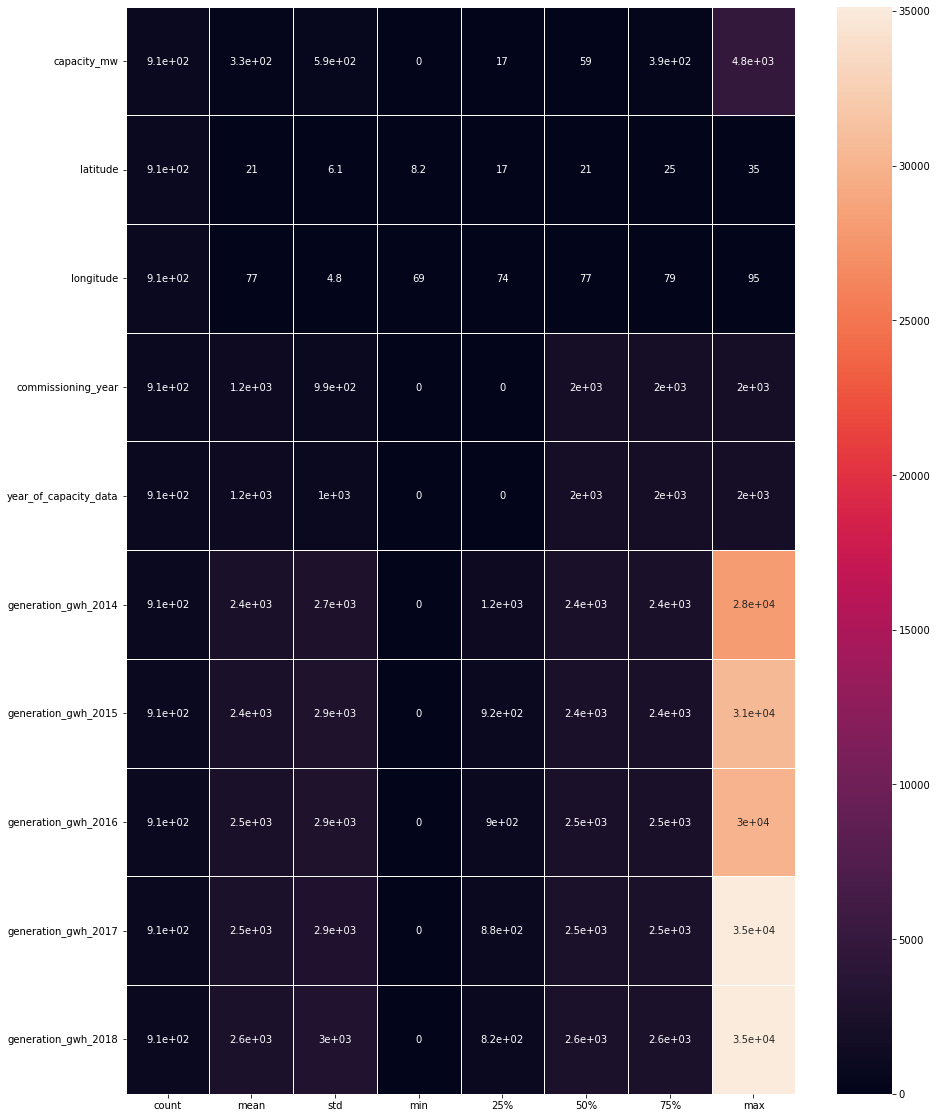

In [108]:
# Visualizing the statistical summary using heatmap
stat=data.describe().T
plt.figure(figsize=(15,20))
sns.heatmap(data=stat,annot=True,linewidths=0.5)
plt.show()

In [109]:
#observations.
# capacity_mg is keep increasing on the values,and it is high value in the year 2017 and 2018.

# Categorising the column before EDA.

In [110]:
data.columns


Index(['country', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [111]:
data_cat=data[['country','name','primary_fuel','owner','source','url','geolocation_source','generation_data_source']].copy()

In [112]:
data_nominal=data[['gppd_idnr','commissioning_year','year_of_capacity_data']].copy()

In [113]:
data_continous=data[['capacity_mw','latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].copy()

In [114]:
data_cat

,country,name,primary_fuel,owner,source,url,geolocation_source,generation_data_source
0,IND,ACME Solar Tower,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0
1,IND,ADITYA CEMENT WORKS,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0
2,IND,AES Saurashtra Windfarms,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0
3,IND,AGARTALA GT,Gas,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,AKALTARA TPP,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,Solar,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0
904,IND,Yelisirur wind power project,Wind,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0
905,IND,ZAWAR MINES,Coal,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0


In [115]:
data_nominal

,gppd_idnr,commissioning_year,year_of_capacity_data
0,WRI1020239,2011.0,0.0
1,WRI1019881,0.0,0.0
2,WRI1026669,0.0,0.0
3,IND0000001,2004.0,2019.0
4,IND0000002,2015.0,2019.0
...,...,...,...
902,IND0000513,2016.0,2019.0
903,WRI1026222,0.0,0.0
904,WRI1026776,0.0,0.0
905,WRI1019901,0.0,0.0


In [116]:
data_continous

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Univariate Analysis

In [117]:
data_cat.columns

Index(['country', 'name', 'primary_fuel', 'owner', 'source', 'url',
       'geolocation_source', 'generation_data_source'],
      dtype='object')

IND    907
Name: country, dtype: int64


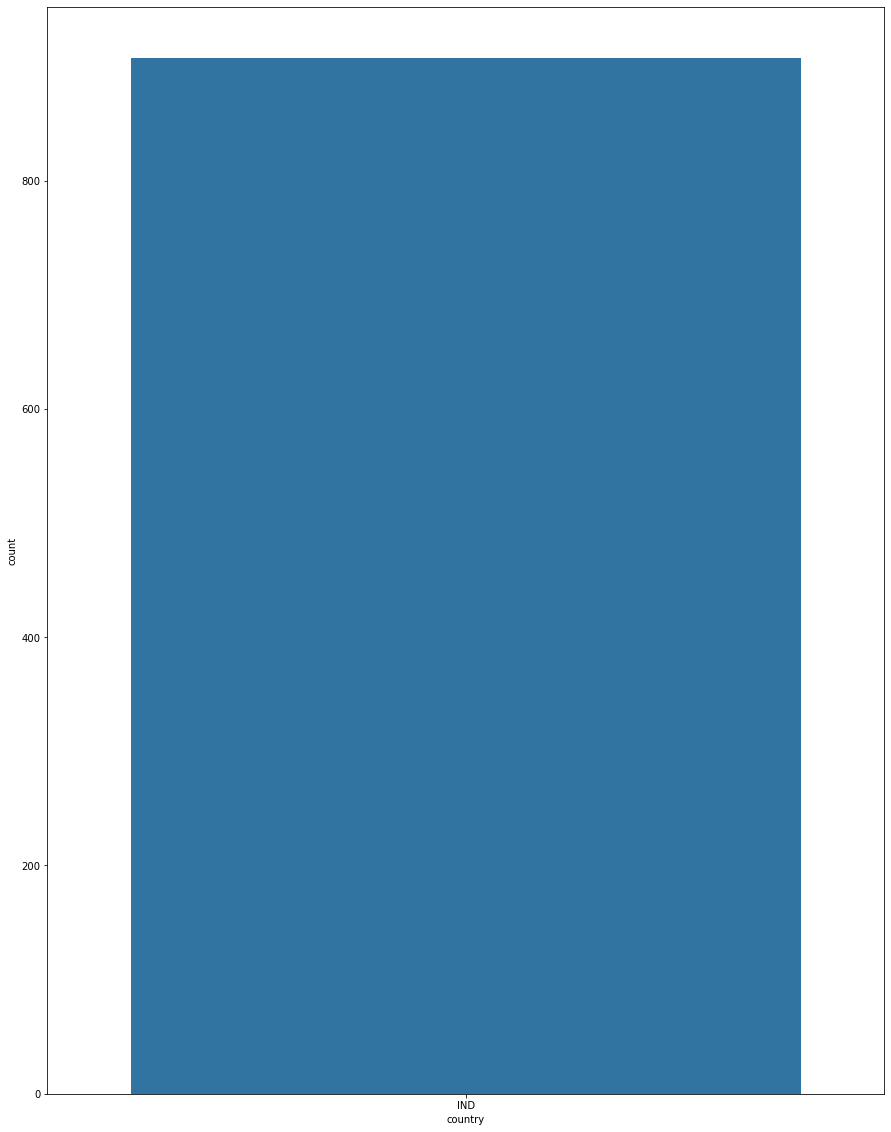

In [118]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['country'])
print(data_cat['country'].value_counts())

In [119]:
# we only have Ind country.

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


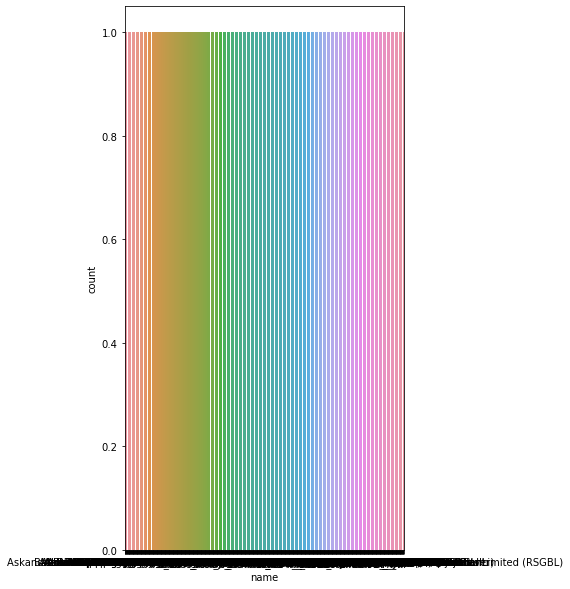

In [120]:
plt.figure(figsize=(5,10))
sns.countplot(x=data_cat['name'])
print(data_cat['name'].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


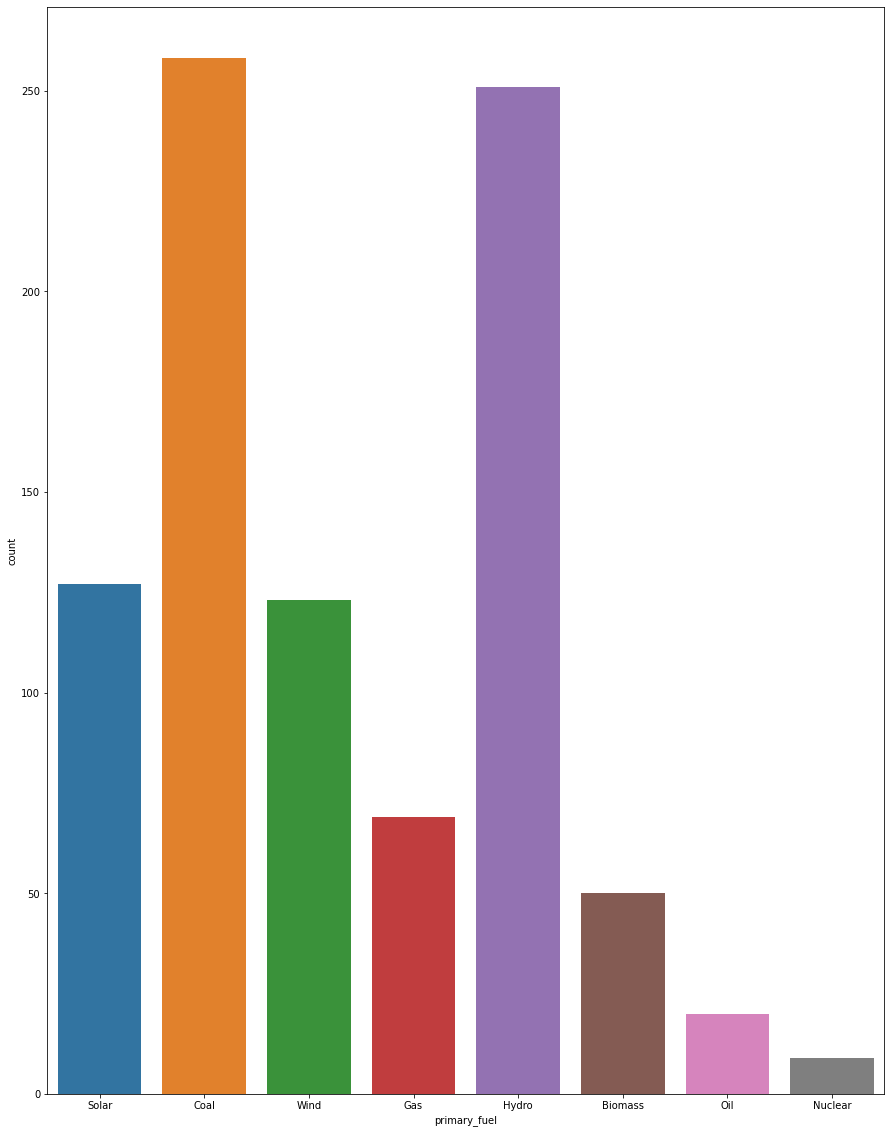

In [121]:
# Checking the output  variable analysis.
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['primary_fuel'])
print(data_cat['primary_fuel'].value_counts())

In [122]:
# We have More power plants(258) with 'coal' as primary fuel.
# We have powerplants(251) with 'hydro'as primaryfuel
# We have powerplants(127) with 'solar' as primaryfuel.
# we have powerplants(123) with 'wind' as primarysource.
# we have powerplants(69)  with 'gas' as its primaryfuel.
# we have powerplants(50) with'Biomass' as its primary fuel.
# we have powerplants(20) with'oil' as its primary fuel.
# we have powerplants(09)  with 'Nuclear' as its primary souce.

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64


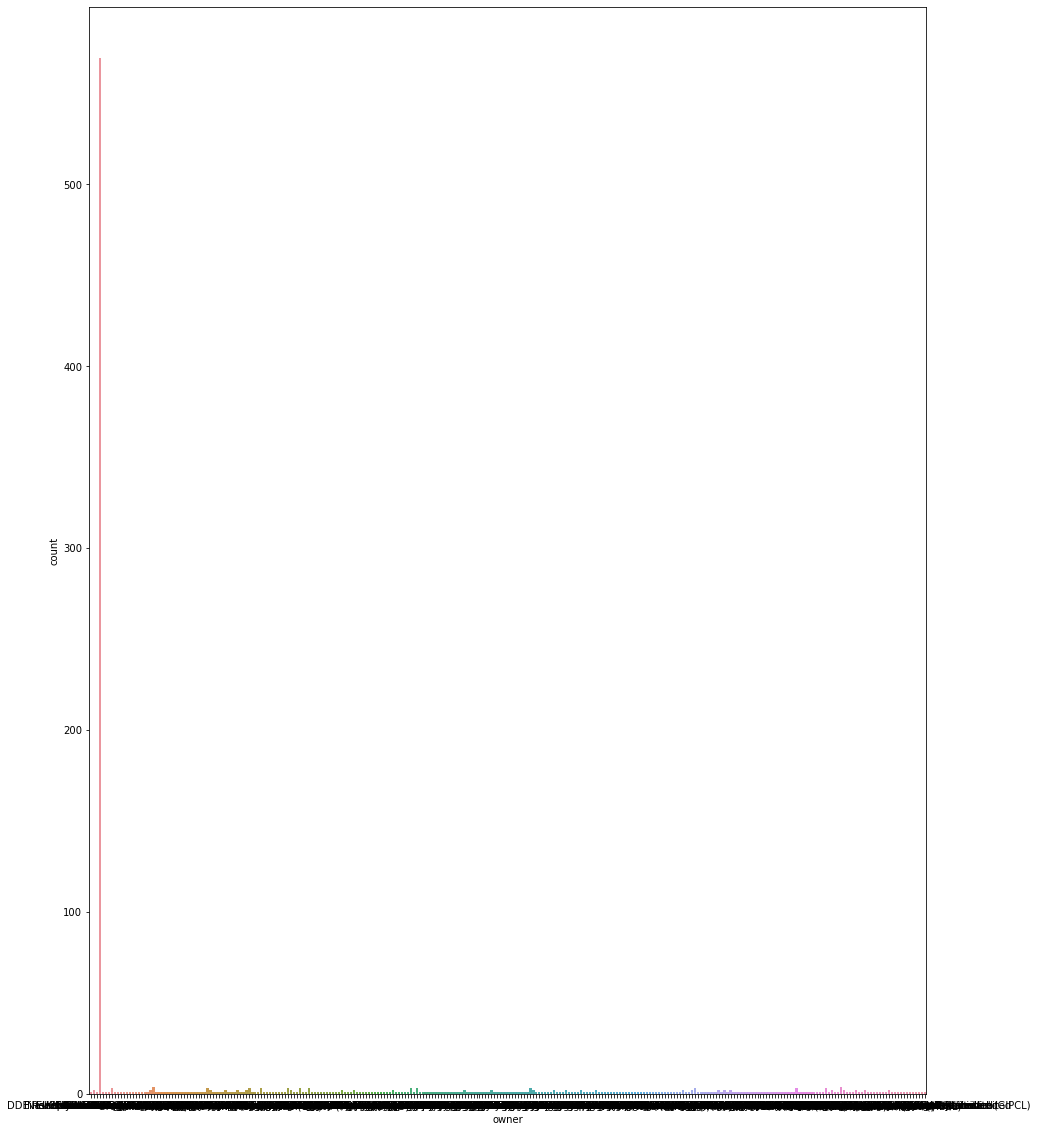

In [123]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['owner'])
print(data_cat['owner'].value_counts())

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


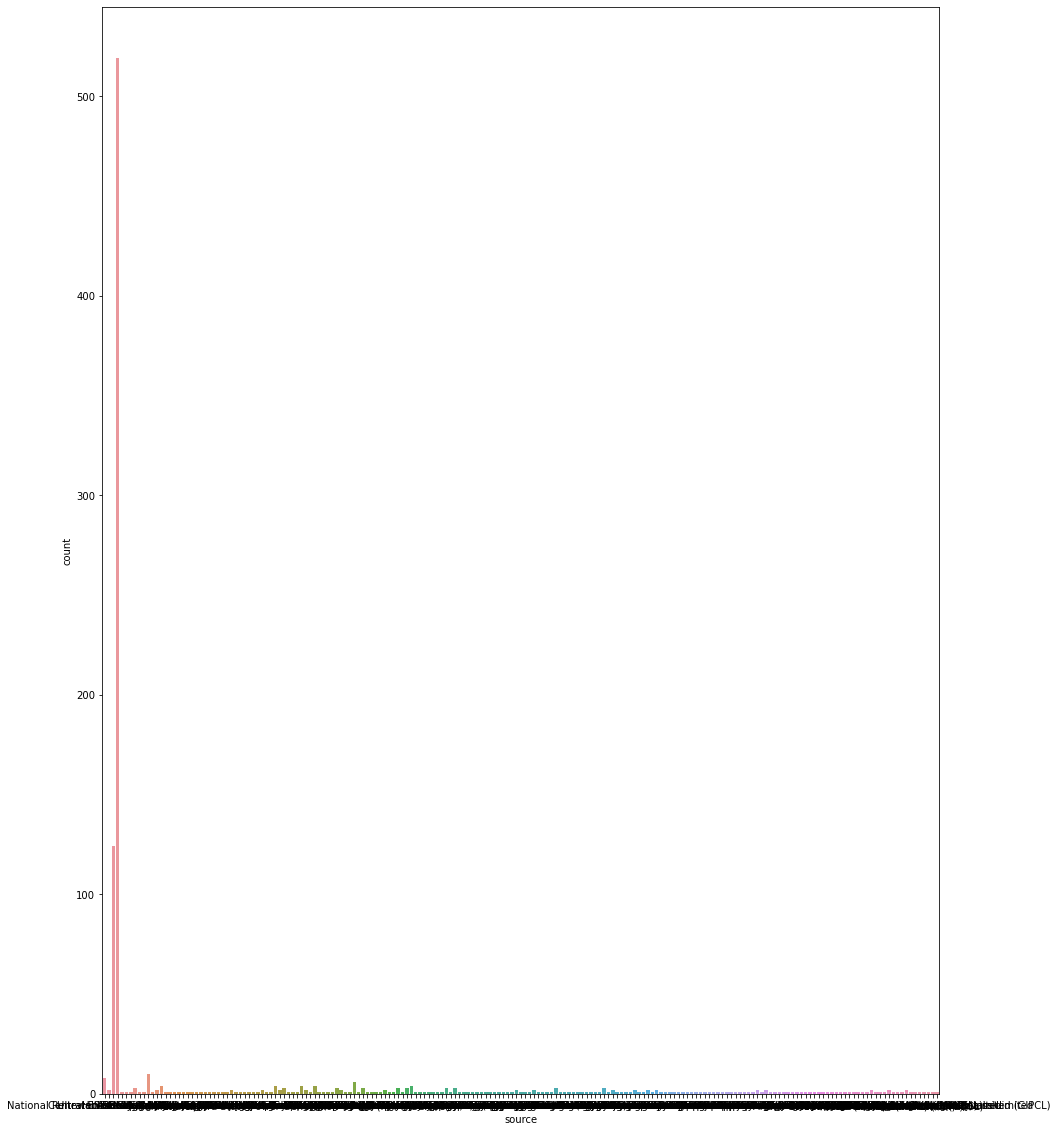

In [124]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['source'])
print(data_cat['source'].value_counts())

In [125]:
# we are dropping the Unnecessary 'URL'column.


In [126]:
data.drop(columns='url',axis=1,inplace=True)


In [127]:
data_cat.drop(columns='url',axis=1,inplace=True)

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


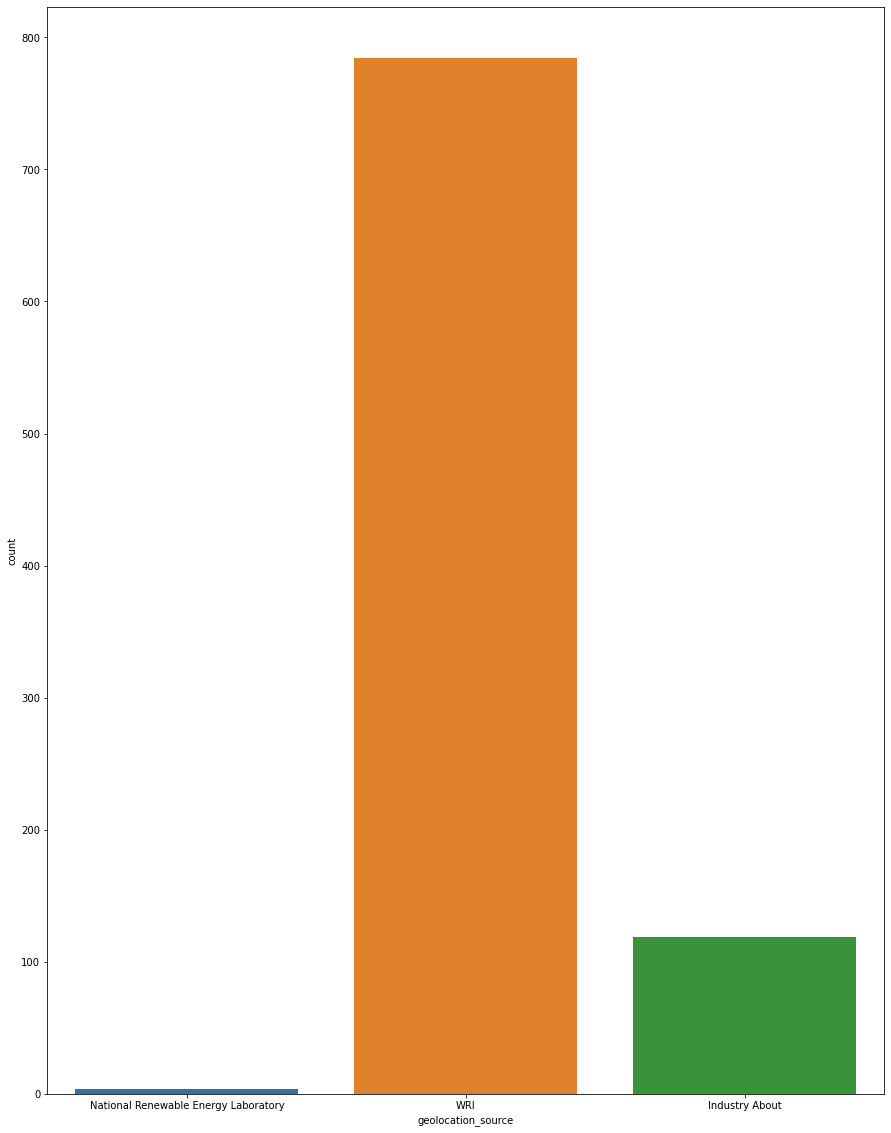

In [128]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['geolocation_source'])
print(data_cat['geolocation_source'].value_counts())

In [129]:
# we have more plants(784) with "WRI" as their geolocation_source.
# we  have second more plants (119) with"Industry About " as their second geolocation_source"
# we have 04 powerplants with National Renewable energy as their geolocation source.

0                                458
Central Electricity Authority    449
Name: generation_data_source, dtype: int64


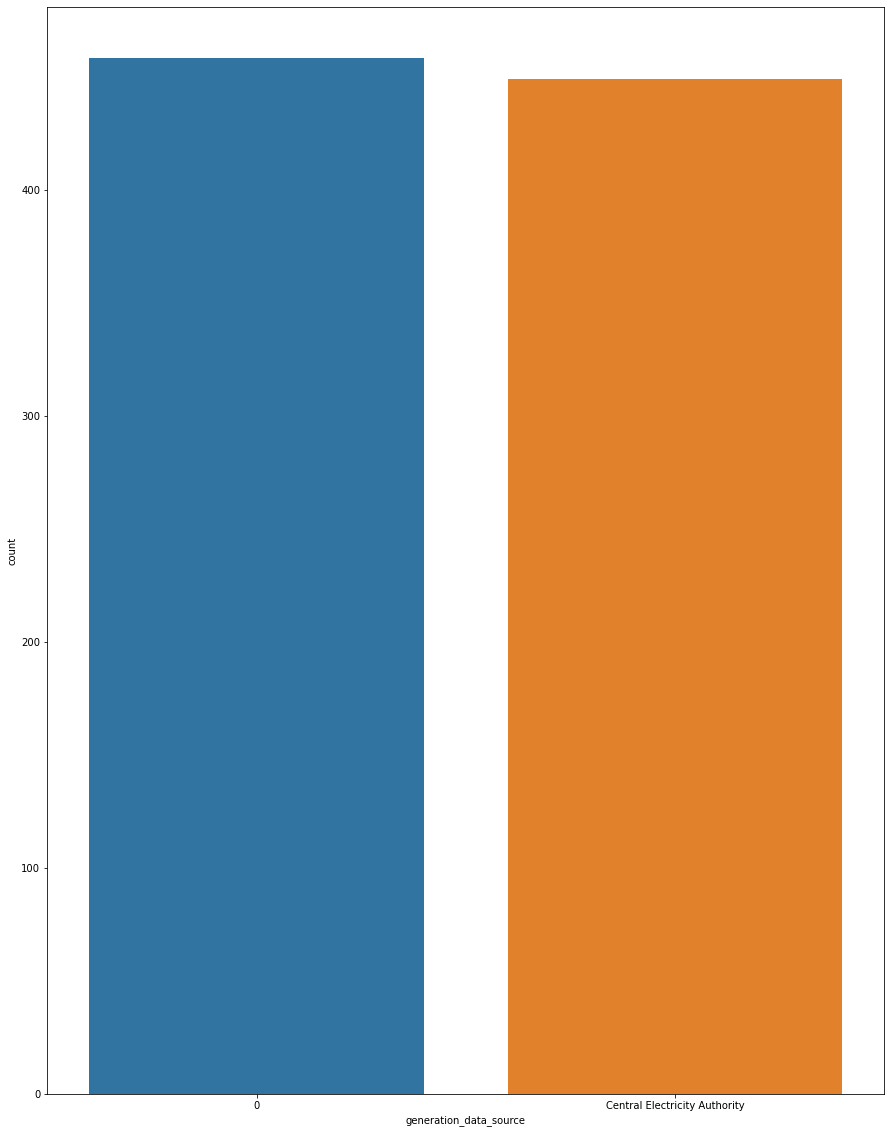

In [130]:
plt.figure(figsize=(15,20))
sns.countplot(x=data_cat['generation_data_source'])
print(data_cat['generation_data_source'].value_counts())

In [131]:
# we have  Central Electricity Authority as their generation_data _source for 449 powerplants.

In [132]:
# we are going to see the distribution of the data_continous.

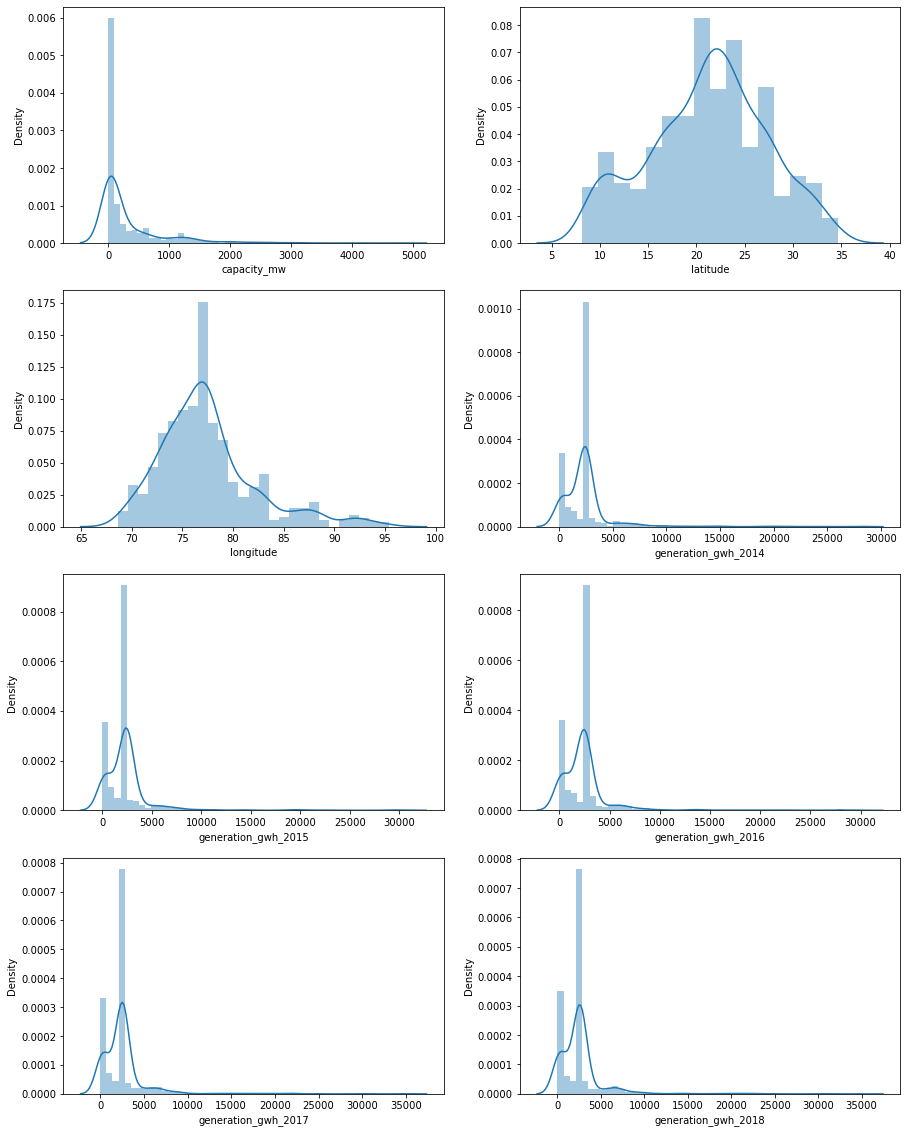

In [133]:
plt.figure(figsize=(15,20))
pltno=1


for columns in data_continous:
    if pltno<=8:
        plt.subplot(4,2,pltno)
        ax=sns.distplot(data_continous[columns])
        plt.xlabel(columns)
    pltno+=1
plt.show()

In [134]:
#observations:
# capacity_mw  follows normal distribution from (0 to 2500) and follows right skewness.
# latitude column follows normal distribution  ( 5 to 40)
# longitude column follows normal distribution from(65 to 95)
# generation_gwh_2014,2015,2016,2017,2018 follows normaldistribution from(0 to 10000),follows right skewness.

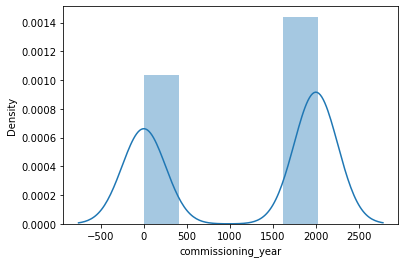

In [135]:
plt.figure()
sns.distplot(data['commissioning_year'])
plt.show()

In [136]:
# observations:
# follows normal distribution from (2000 to 2500)commissioning _year.

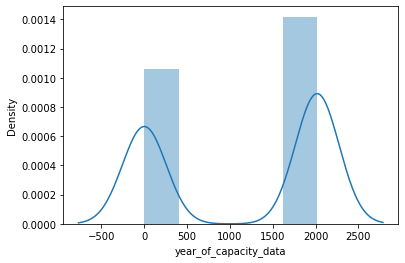

In [137]:
plt.figure()
sns.distplot(data['year_of_capacity_data'])
plt.show()

# Bivariate Analysis

# Feature VS Target Analysis(Target=capacity_mw)

In [138]:
x=data.drop(columns='capacity_mw',axis=1)
x

,country,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,IND,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,Coal,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,IND,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,Wind,0.0,AES,CDM,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,IND,AGARTALA GT,IND0000001,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,Solar,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,IND,Yelisirur wind power project,WRI1026776,15.2758,75.5811,Wind,0.0,Acc Acc ltd,CDM,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,IND,ZAWAR MINES,WRI1019901,24.3500,73.7477,Coal,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [139]:
y=data['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

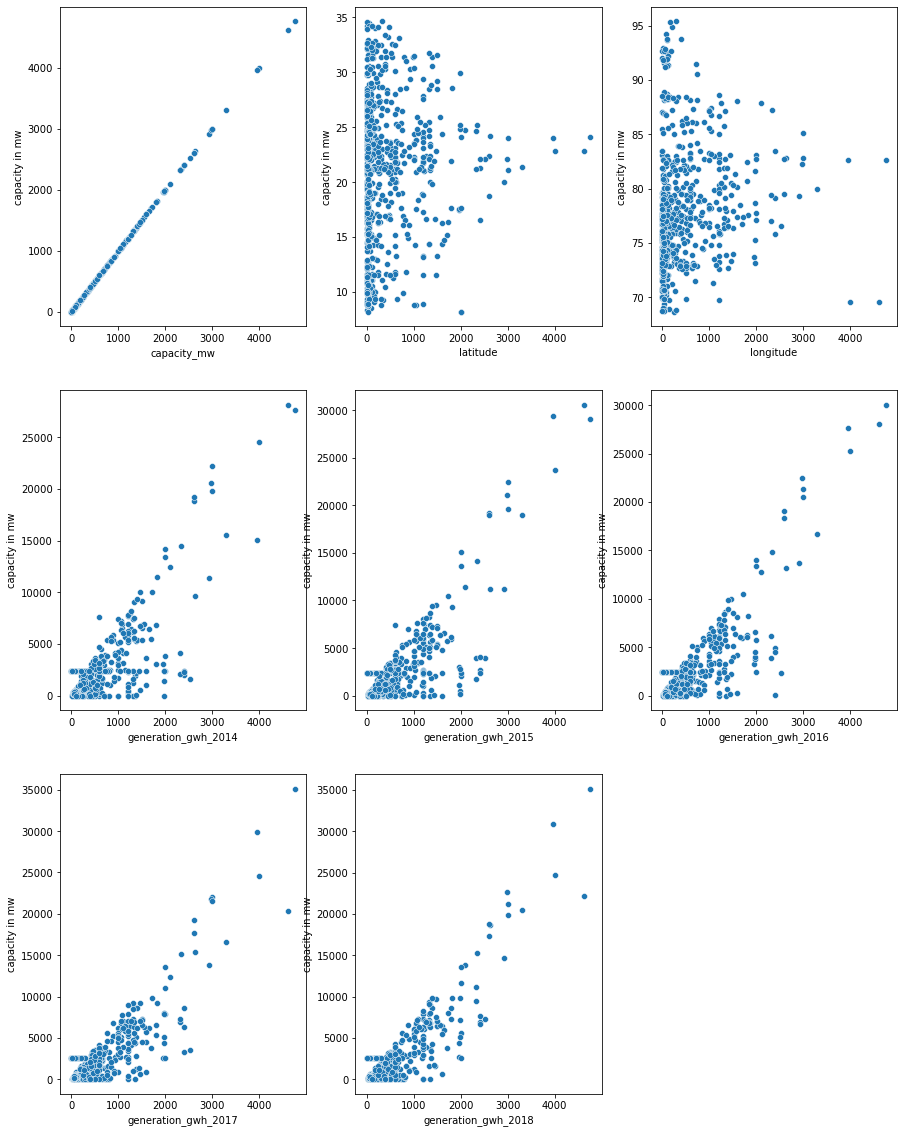

In [140]:
plt.figure(figsize=(15,20))
draw=1
for columns in data_continous:
    if draw<=9:
        plt.subplot(3,3,draw)
        ax=sns.scatterplot(y,data_continous[columns])
        plt.xlabel(columns)
        plt.ylabel('capacity in mw')
    draw+=1
plt.show()

In [141]:
# Observations:
# columns latitude ,longitude data is scattered and also can see increasing trend.
# Generation_gwh_(2014,2015,2016,2017,2018) follows increase in trend towards the capacity_mw.

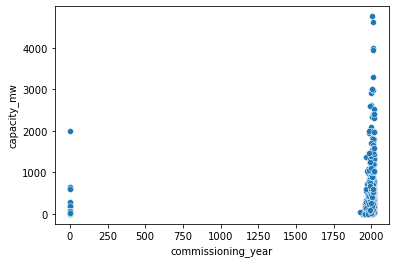

In [142]:
plt.figure()
sns.scatterplot(x=data['commissioning_year'],y=data['capacity_mw'])
plt.show()

In [143]:
#observations:
# capacity_mw increased in the year commisioning year from (2000)

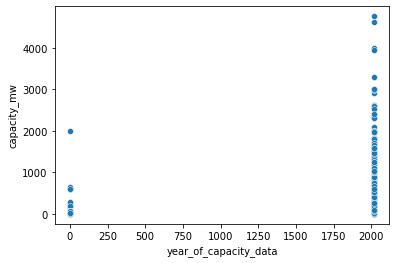

In [144]:
plt.figure()
sns.scatterplot(x=data['year_of_capacity_data'],y=data['capacity_mw'])
plt.show()

In [145]:
#observations:
# capacity mg increases when the year_of capacity is at 2000 range.

# Encoding Categorical columns.

In [146]:
data_cat.columns

Index(['country', 'name', 'primary_fuel', 'owner', 'source',
       'geolocation_source', 'generation_data_source'],
      dtype='object')

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
le=LabelEncoder()

In [149]:
country=le.fit_transform(data_cat['country'])
country
    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [150]:
le_primary=le.fit_transform(data_cat['primary_fuel'])
le_primary

array([6, 1, 7, 2, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 2, 1, 1, 0, 0, 0,
       2, 1, 1, 6, 6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 1, 0, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3,
       3, 7, 7, 1, 0, 0, 5, 1, 1, 1, 3, 1, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 7, 5, 2, 1, 3, 5,
       1, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6,
       6, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 6,
       6, 7, 6, 1, 1, 2, 4, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       5, 3, 3, 2, 0, 5, 3, 3, 3, 0, 3, 1, 1, 1, 6, 2, 7, 6, 7, 6, 6, 6,
       6, 6, 6, 3, 3, 7, 2, 7, 7, 7, 7, 1, 2, 7, 2, 7, 1, 2, 3, 2, 2, 3,
       1, 3, 3, 2, 1, 7, 3, 3, 3, 1, 1, 3, 7, 1, 2, 1, 1, 2, 1, 3, 7, 6,
       6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 7,
       7, 7, 7, 7, 1, 7, 6, 1, 2, 3, 3, 1, 7, 1, 1, 3, 1, 1, 7, 6, 6, 3,
       0, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 6, 6, 7,

In [151]:
data['primary_fuel']=le_primary

In [152]:
le_owner=le.fit_transform(data_cat['owner'])
le_owner

array([229, 258,   2,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,  89,   5,  49,  14, 219,   5,   5, 258,  53,
       160,   5, 132,   5, 135,   5,  41,  52,  58, 117, 161, 209, 265,
         5, 100,   5,   5,   5,   5,   5,   5,  20, 108,   5,   5,   5,
         5,   5,   5,   5,  97,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,  24,  26,  96, 256, 268,   5,  93, 105,   5,   5, 152,
         5, 238, 262,   5,   5,   5,   5,   5,   5,   5,  20,   5,   5,
         5,   5,   5, 211,  25,   5,  28,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5, 101,   5,  48,   3,  54,  77,  77, 170,
       180,  92, 147,  66, 123,   5,   5,   5,   5,   5, 126,   5,   4,
         6, 134, 191,   5,   5,   5,   5,   5,  30,  91,  84, 142,   5,
         5,   5,   5,   5,   5,   5,   5,   5,   5,  40, 136,  35,  98,
         8,   5,   5,   5,   5, 196,   5,  31,  43,  44,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5, 149,   5,   5,   5, 22

In [153]:
data['owner']=le_owner

In [154]:
le_source=le.fit_transform(data_cat['source'])
le_source

array([109, 174,  21,  22,  22,  22,  22,  22,  22,  22,  22,  22,  22,
        22,  22,  22,  22,  58,  22,  36,  10, 148,  22,  22, 174, 109,
       112,  21,  97,  21,  21,  21,  84,  84,  84,  84,  84,  84,  84,
        22,  67,  22,  22,  22,  22,  22,  22,  14,  75,  22,  22,  22,
        22,  22,  22,  22,  65,  22,  22,  22,  22,  22,  22,  22,  22,
        22,  22,  21,  21,  64, 172, 184,  22,  62,  72,  22,  22, 106,
        22, 163, 179,  22,  22,  22,  22,  22,  22,  22,  14,  22,  22,
        22,  22,  22, 142,  17,  22,  18,  22,  22,  22,  22,  22,  22,
        21,  22,  22,  22,  22,  68,  22,   6,   2,  21, 144, 144,  21,
       125,  61, 102,  85,  83,  21,  21,  21,  21,  21,  84,  21,  26,
         4,  88, 122,  22,  22,  22,  22,   3,  19,  59,  54,  95,  22,
        22,  22,  22,  22,  22,  22,  22,  22,  22,  29,  89, 157,  21,
       119,  22,  22,  22,  22, 134,  22,  20,  31,  32,  22,  22,  22,
        22,  22,  22,  22,  22,  22,  22, 103,  22,  22,  22, 15

In [155]:
data['source']=le_source

In [156]:
le_geoso=le.fit_transform(data_cat['geolocation_source'])
le_geoso

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,

In [157]:
data['geolocation_source']=le_geoso

In [158]:
data['generation_data_source'].value_counts()

0                                458
Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [159]:
data['generation_data_source']=data_cat['generation_data_source']
data['generation_data_source'].value_counts()

0                                458
Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [160]:
data['generation_data_source']=data['generation_data_source'].astype('str')

In [161]:
data['generation_data_source']

0                                  0
1                                  0
2                                  0
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
902    Central Electricity Authority
903                                0
904                                0
905                                0
906                                0
Name: generation_data_source, Length: 907, dtype: object

In [162]:
le_gen=le.fit_transform(data['generation_data_source'])
le_gen

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [163]:
data['generation_data_source']=le_gen

In [164]:
# AFter Encoding the Categorical column,checking the Dataset
data

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2011.0,229,109,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,0.0,258,174,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,0.0,2,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2004.0,5,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2015.0,5,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,2016.0,5,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,0.0,114,77,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,0.0,5,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,0.0,91,59,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [165]:
# Removing the Unnecessary columns['name']and['gppd_idnr'] and ['country'] from the dataset.

In [166]:
data.drop(columns=['name','gppd_idnr'],axis=1,inplace=True)

In [167]:
data.drop(columns='country',axis=1,inplace=True)

In [168]:
data.shape # After removing the unnecessary columns,rechecking the Datashape.

(907, 15)

# coefficient correlation

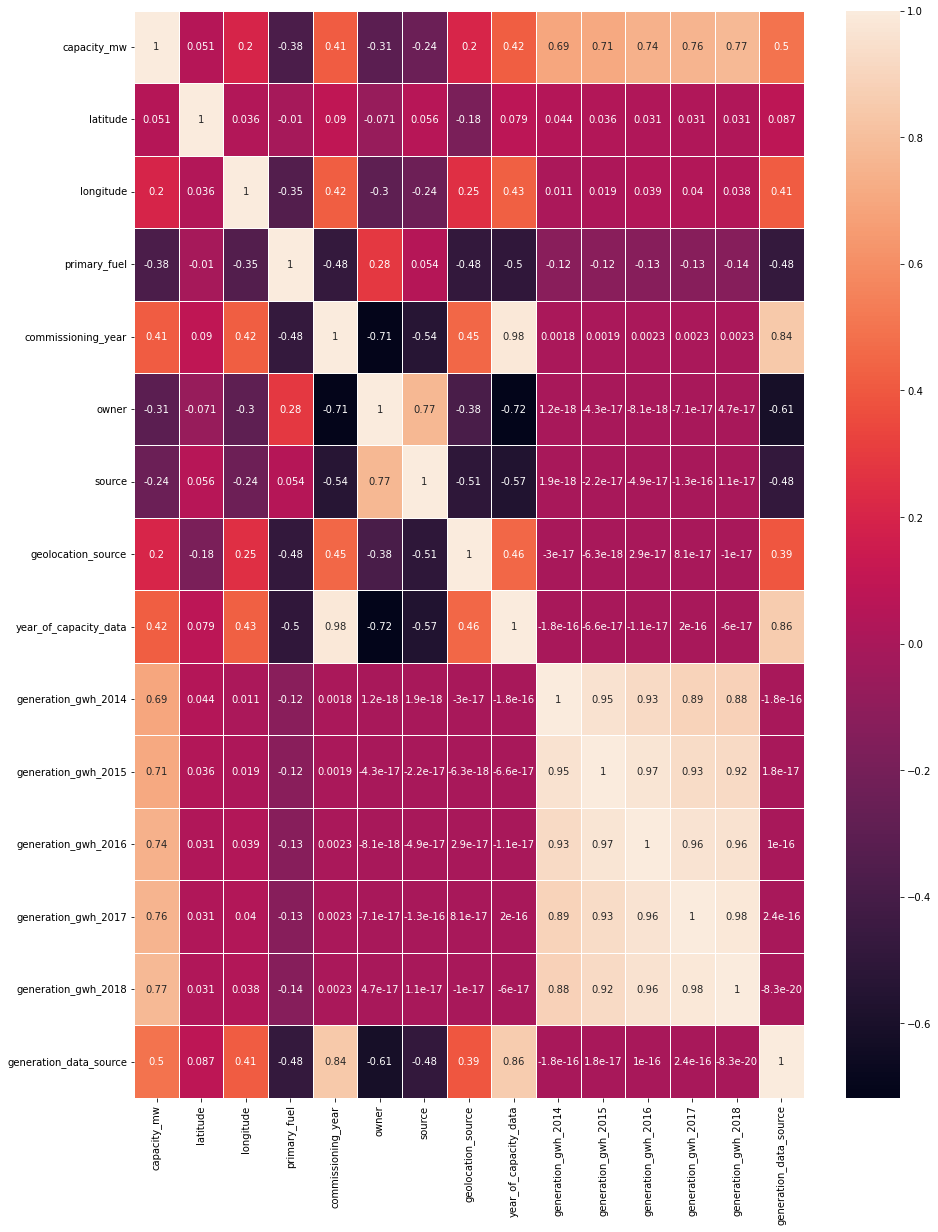

In [169]:
corr=data.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [170]:
corr['capacity_mw'].sort_values(ascending=False) # seeing the corelation of values in Increasing way.

capacity_mw               1.000000
generation_gwh_2018       0.773456
generation_gwh_2017       0.757585
generation_gwh_2016       0.742221
generation_gwh_2015       0.711190
generation_gwh_2014       0.694350
generation_data_source    0.495833
year_of_capacity_data     0.417896
commissioning_year        0.414667
geolocation_source        0.204865
longitude                 0.195882
latitude                  0.050984
source                   -0.242122
owner                    -0.311048
primary_fuel             -0.380395
Name: capacity_mw, dtype: float64

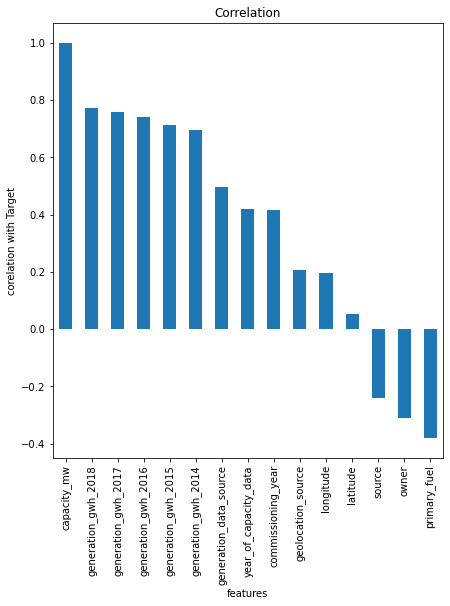

In [171]:
plt.figure(figsize=(7,8))
corr['capacity_mw'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

In [172]:
# Observations:
# the Data in the columns have strong corelaation with Target['generation_gwh[2018,2017,2016,2015,2014]']
# The Longitude column is having least corelation with Target.
# the columns['year_of _capacity_data'], commissioning year,source,owner is having medium bond with Target


In [173]:
# the Columns['generation_gwh_2015']and ['generation_gwh_2016']is highly corelated.checking the graph of the same.

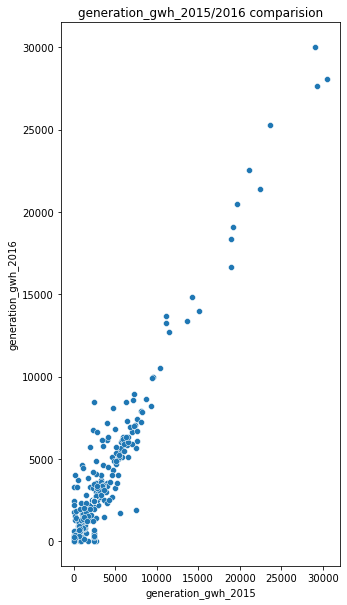

In [174]:
plt.figure(figsize=(5,10))
sns.scatterplot(x=data['generation_gwh_2015'],y=data['generation_gwh_2016'])
plt.xlabel('generation_gwh_2015')
plt.ylabel('generation_gwh_2016')
plt.title('generation_gwh_2015/2016 comparision')
plt.show()

In [175]:
# Both of them follows increasing trend like ,
#generation_gwh_2016       0.742221
#generation_gwh_2015       0.711190
# These are the values they are contributing to the Targethence not removing,will check using VIF for the same.

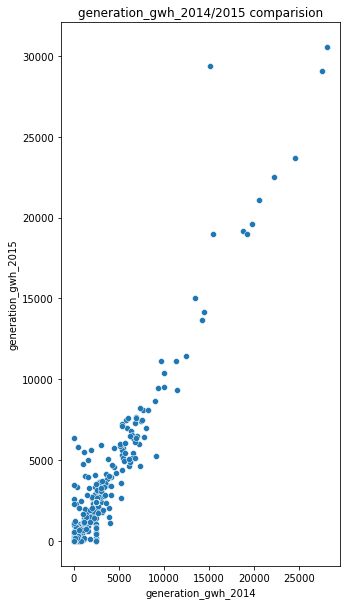

In [176]:
plt.figure(figsize=(5,10))
sns.scatterplot(x=data['generation_gwh_2014'],y=data['generation_gwh_2015'])
plt.xlabel('generation_gwh_2014')
plt.ylabel('generation_gwh_2015')
plt.title('generation_gwh_2014/2015 comparision')
plt.show()

In [177]:
# Both of them follows increasing trend like ,
#generation_gwh_2014       0.694
#generation_gwh_2015       0.711
# These are the values they are contributing to the Targethence not removing,will check using VIF for the same.

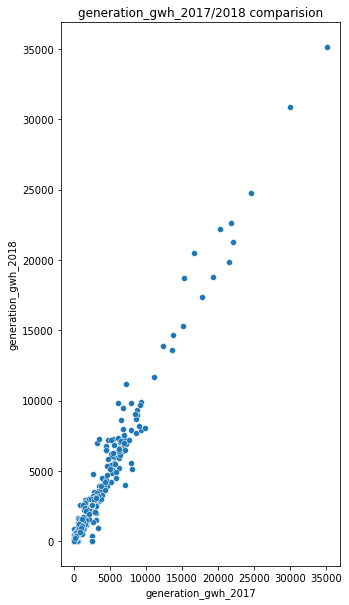

In [178]:
plt.figure(figsize=(5,10))
sns.scatterplot(x=data['generation_gwh_2017'],y=data['generation_gwh_2018'])
plt.xlabel('generation_gwh_2017')
plt.ylabel('generation_gwh_2018')
plt.title('generation_gwh_2017/2018 comparision')
plt.show()

In [179]:
# Both of them follows increasing trend like ,
#generation_gwh_2017       0.77
#generation_gwh_2018       0.75
# These are the values they are contributing to the Targethence not removing,will check using VIF for the same.

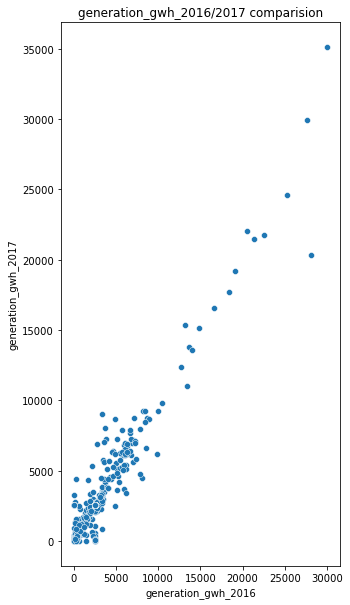

In [180]:
plt.figure(figsize=(5,10))
sns.scatterplot(x=data['generation_gwh_2016'],y=data['generation_gwh_2017'])
plt.xlabel('generation_gwh_2016')
plt.ylabel('generation_gwh_2017')
plt.title('generation_gwh_2016/2017 comparision')
plt.show()

In [181]:
# Both of them follows increasing trend like ,
#generation_gwh_2016       0.74
#generation_gwh_2017       0.77
# These are the values they are contributing to the Targethence not removing,will check using VIF for the same.

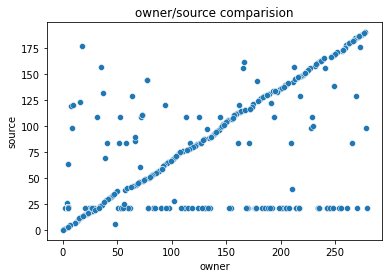

In [182]:
# plt.figure(figsize=(5,10))
sns.scatterplot(x=data['owner'],y=data['source'])
plt.xlabel('owner')
plt.ylabel('source')
plt.title('owner/source comparision')
plt.show()

In [183]:
# Both of them follows increasing trend like ,
#owner -0.2
#source -0.3
# These are the values they are contributing to the Targethence not removing,will check using VIF for the same.


# Selecting best Features using Kbest method.

In [184]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [185]:
x=data.drop(columns='capacity_mw',axis=1)
x

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,28.1839,73.2407,6,2011.0,229,109,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,24.7663,74.6090,1,0.0,258,174,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,21.9038,69.3732,7,0.0,2,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,23.8712,91.3602,2,2004.0,5,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,21.9603,82.4091,1,2015.0,5,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2016.0,5,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1
903,12.8932,78.1654,6,0.0,114,77,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,15.2758,75.5811,7,0.0,5,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,24.3500,73.7477,1,0.0,91,59,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [186]:
y=data['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [187]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,1.350622,latitude
1,1.608777,longitude
2,3.093422,primary_fuel
3,3.738514,commissioning_year
4,1.927336,owner
5,1.656328,source
6,3.173683,geolocation_source
7,3.858605,year_of_capacity_data
8,13.248132,generation_gwh_2014
9,14.475647,generation_gwh_2015


In [188]:
best_score.sort_values('score',ascending=False)

,score,columnname
12,20.622251,generation_gwh_2018
11,18.547703,generation_gwh_2017
10,16.327765,generation_gwh_2016
9,14.475647,generation_gwh_2015
8,13.248132,generation_gwh_2014
13,8.459427,generation_data_source
7,3.858605,year_of_capacity_data
3,3.738514,commissioning_year
6,3.173683,geolocation_source
2,3.093422,primary_fuel


In [189]:
# after considering the Best _Features using corelation and Select K Best method,
#removing the columns['owner','source','longitude','latitude'] from the dataset.

In [190]:
data.drop(columns=['owner','source','longitude','latitude'],axis=1,inplace=True)
data

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6,2011.0,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,98.0,1,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,39.2,7,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,135.0,2,2004.0,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,1,2015.0,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1,2016.0,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1
903,3.0,6,0.0,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,25.5,7,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,80.0,1,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


# Outliers

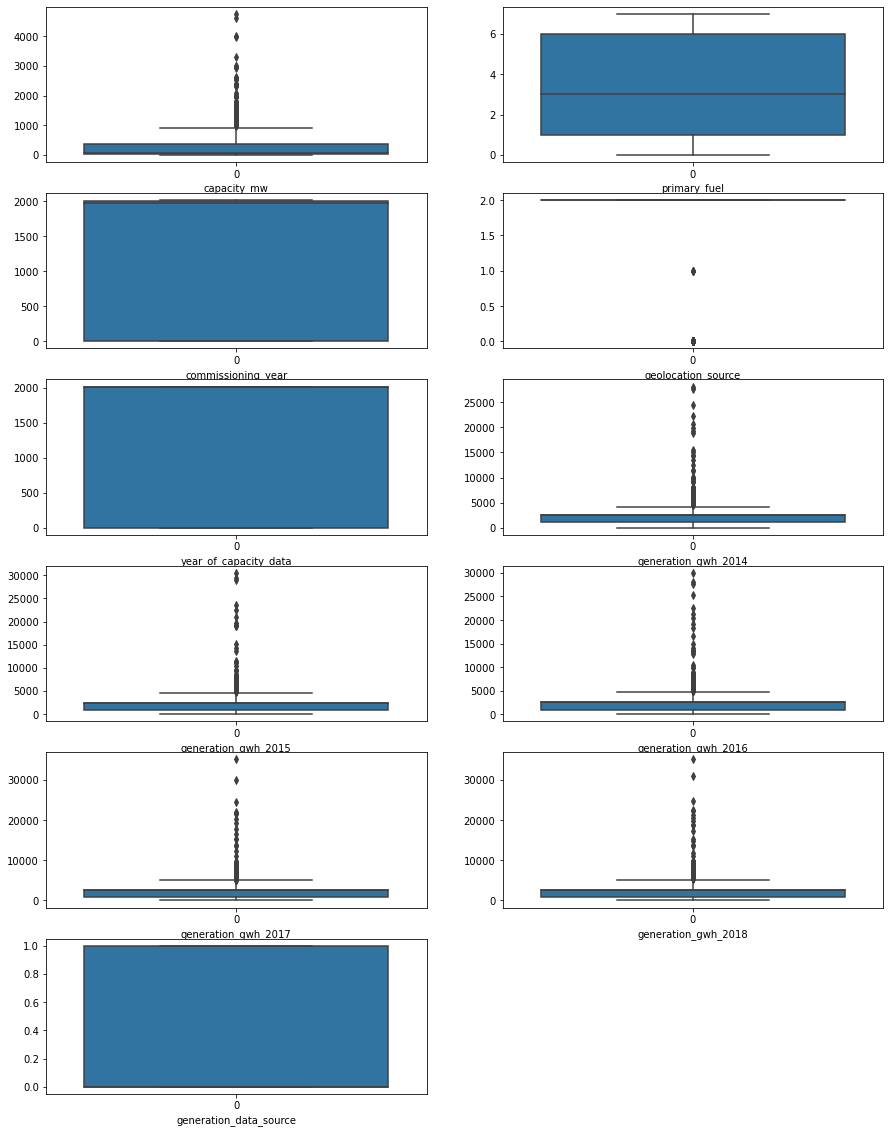

In [191]:
# seeing the outliers using boxplot.
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data:
    if plotnumber<=11:
        plt.subplot(6,2,plotnumber)
        ax=sns.boxplot(data=data[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()



In [192]:
#Using Z-Score method.
from scipy.stats import zscore

In [193]:
z=np.abs(zscore(data))
z

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.548908,1.225688,0.863195,1.083349,1.156559,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
1,0.386977,0.967877,1.177540,0.394241,1.156559,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
2,0.486679,1.664401,1.177540,0.394241,1.156559,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
3,0.324240,0.529164,0.856091,0.394241,0.864634,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,1.009973
4,2.498942,0.967877,0.867254,0.394241,0.864634,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,1.009973
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.967877,0.868269,0.394241,0.864634,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,1.009973
903,0.548060,1.225688,1.177540,2.560940,1.156559,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
904,0.509909,1.664401,1.177540,0.394241,1.156559,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
905,0.417498,0.967877,1.177540,0.394241,1.156559,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126


In [194]:
data_new=data[(z<3).all(axis=1)]
data_new

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6,2011.0,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,98.0,1,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,39.2,7,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,135.0,2,2004.0,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,1,2015.0,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1,2016.0,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,1
903,3.0,6,0.0,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,25.5,7,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,80.0,1,0.0,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


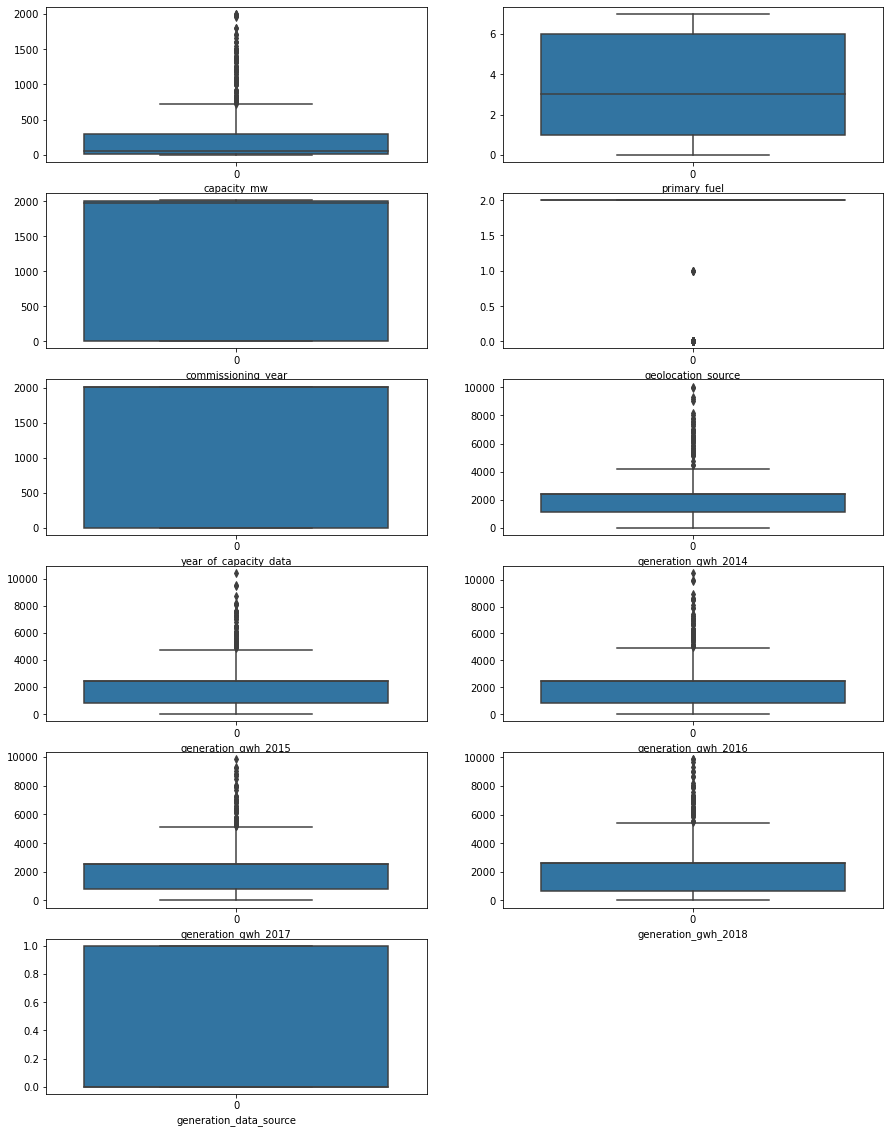

In [195]:
# after removing Zscore,we will see the boxplot again
plt.figure(figsize=(15,20))
plotnumber=1
for columns in data_new:
    if plotnumber<=11:
        plt.subplot(6,2,plotnumber)
        ax=sns.boxplot(data=data_new[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()


In [196]:
print("old datashape size",data.shape[0])
print("New Datashape size",data_new.shape[0])
print("Data Loss:",(data.shape[0]-data_new.shape[0])/data.shape[0]*100)

old datashape size 907
New Datashape size 884
Data Loss: 2.535832414553473


In [197]:
# Since,the Data loss is less,proceeding with data_new for checking skewness.

# Skewness check

In [198]:
data_new.skew()

capacity_mw               2.040041
primary_fuel              0.431767
commissioning_year       -0.283302
geolocation_source       -2.116425
year_of_capacity_data    -0.246607
generation_gwh_2014       1.508578
generation_gwh_2015       1.385508
generation_gwh_2016       1.411148
generation_gwh_2017       1.279383
generation_gwh_2018       1.317201
generation_data_source    0.072569
dtype: float64

In [199]:
# we can see that data is skewed,we will use transformation techniques to convert the same.

In [1]:
from sklearn.preprocessing import PowerTransformer

In [201]:
pt=PowerTransformer()
pwr=pt.fit_transform(data_new)
data_pwr=pd.DataFrame(data=pwr,columns=data_new.columns)
data_pwr

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,-1.689394,1.152105,0.871136,-2.296850,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
1,0.242377,-1.023778,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
2,-0.260103,1.432501,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
3,0.416289,-0.401505,0.869759,0.401998,0.884454,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268,1.036879
4,1.772887,-1.023778,0.871921,0.401998,0.884454,0.691112,1.906185,1.942740,1.576315,2.122732,1.036879
...,...,...,...,...,...,...,...,...,...,...,...
879,1.713273,-1.023778,0.872117,0.401998,0.884454,0.356710,-2.084748,-1.391997,-0.686104,-0.830792,1.036879
880,-1.608549,1.152105,-1.151654,-2.493553,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
881,-0.496946,1.432501,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
882,0.131637,-1.023778,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433


In [202]:
# after applying power_Transformer method,we will check the skewness now.
data_pwr.skew()

capacity_mw               0.016627
primary_fuel             -0.057443
commissioning_year       -0.283806
geolocation_source       -2.089585
year_of_capacity_data    -0.246607
generation_gwh_2014      -0.253122
generation_gwh_2015      -0.308165
generation_gwh_2016      -0.309157
generation_gwh_2017      -0.339708
generation_gwh_2018      -0.348750
generation_data_source    0.072569
dtype: float64

In [203]:
# though the skewness is removed,still ill check the same with quantile transformer method.

In [204]:
from sklearn.preprocessing import QuantileTransformer

In [205]:
qt=QuantileTransformer()
qua=qt.fit_transform(data_new)
data_qua=pd.DataFrame(data=qua,columns=data_new.columns)
data_qua

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.039638,0.789354,0.850510,0.136467,0.0,0.596263,0.601359,0.602492,0.605889,0.610419,0.0
1,0.592299,0.189128,0.000000,1.000000,0.0,0.596263,0.601359,0.602492,0.605889,0.610419,0.0
2,0.442809,1.000000,0.000000,1.000000,0.0,0.596263,0.601359,0.602492,0.605889,0.610419,0.0
3,0.657418,0.360702,0.766704,1.000000,1.0,0.207248,0.251416,0.254813,0.235561,0.240091,1.0
4,0.990940,0.189128,0.940544,1.000000,1.0,0.908267,0.966025,0.969422,0.945640,0.981880,1.0
...,...,...,...,...,...,...,...,...,...,...,...
879,0.984711,0.189128,0.966591,1.000000,1.0,0.596263,0.032843,0.143828,0.254813,0.249151,1.0
880,0.044734,0.789354,0.000000,0.000000,0.0,0.596263,0.601359,0.602492,0.605889,0.610419,0.0
881,0.352775,1.000000,0.000000,1.000000,0.0,0.596263,0.601359,0.602492,0.605889,0.610419,0.0
882,0.569083,0.189128,0.000000,1.000000,0.0,0.596263,0.601359,0.602492,0.605889,0.610419,0.0


In [206]:
data_qua.skew()

capacity_mw               0.000661
primary_fuel              0.138802
commissioning_year        0.032050
geolocation_source       -2.091604
year_of_capacity_data    -0.246607
generation_gwh_2014      -0.271787
generation_gwh_2015      -0.235138
generation_gwh_2016      -0.221915
generation_gwh_2017      -0.220061
generation_gwh_2018      -0.221410
generation_data_source    0.072569
dtype: float64

In [207]:
# After checking both the Transformation,choosing power _transformer method to continue further

In [208]:
print("old datashape size",data_new.shape[0])
print("New Datashape size",data_pwr.shape[0])
print("Data Loss:",(data_new.shape[0]-data_pwr.shape[0])/data_new.shape[0]*100)

old datashape size 884
New Datashape size 884
Data Loss: 0.0


# preprocessing

In [209]:
x=data_pwr.drop(columns=['capacity_mw'],axis=1)
x

,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,1.152105,0.871136,-2.296850,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
1,-1.023778,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
2,1.432501,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
3,-0.401505,0.869759,0.401998,0.884454,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268,1.036879
4,-1.023778,0.871921,0.401998,0.884454,0.691112,1.906185,1.942740,1.576315,2.122732,1.036879
...,...,...,...,...,...,...,...,...,...,...
879,-1.023778,0.872117,0.401998,0.884454,0.356710,-2.084748,-1.391997,-0.686104,-0.830792,1.036879
880,1.152105,-1.151654,-2.493553,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
881,1.432501,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
882,-1.023778,-1.151654,0.401998,-1.130642,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433


In [210]:
y=data_pwr['capacity_mw']
y.shape

(884,)

In [211]:
# Since power Transformer technique  already used standarization ,we dont have to use standard scaler for our dataset.

# Checking Multicollinearity using VIF.

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [213]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,1.431933,primary_fuel
1,27.735689,commissioning_year
2,1.463637,geolocation_source
3,30.846840,year_of_capacity_data
4,4.348268,generation_gwh_2014
5,8.258323,generation_gwh_2015
6,11.889493,generation_gwh_2016
7,11.626814,generation_gwh_2017
8,12.394232,generation_gwh_2018
9,4.057242,generation_data_source


In [214]:
# Since the Values of VIF >10,then we remove the column from the Dataset,
#decided to remove year_of_capacity_data from the columns

In [215]:
x=data_pwr.drop(columns=['year_of_capacity_data'],axis=1)
x

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,-1.689394,1.152105,0.871136,-2.296850,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
1,0.242377,-1.023778,-1.151654,0.401998,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
2,-0.260103,1.432501,-1.151654,0.401998,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
3,0.416289,-0.401505,0.869759,0.401998,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268,1.036879
4,1.772887,-1.023778,0.871921,0.401998,0.691112,1.906185,1.942740,1.576315,2.122732,1.036879
...,...,...,...,...,...,...,...,...,...,...
879,1.713273,-1.023778,0.872117,0.401998,0.356710,-2.084748,-1.391997,-0.686104,-0.830792,1.036879
880,-1.608549,1.152105,-1.151654,-2.493553,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
881,-0.496946,1.432501,-1.151654,0.401998,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433
882,0.131637,-1.023778,-1.151654,0.401998,0.356710,0.383316,0.386313,0.388954,0.405331,-0.964433


In [216]:
# After removing the column,rechecking the VIF values again.

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,4.142162,capacity_mw
1,1.445729,primary_fuel
2,3.680787,commissioning_year
3,1.614413,geolocation_source
4,4.399532,generation_gwh_2014
5,8.259430,generation_gwh_2015
6,11.915384,generation_gwh_2016
7,11.675546,generation_gwh_2017
8,12.442912,generation_gwh_2018
9,7.735624,generation_data_source


In [217]:
# Still there are Lots of values with VIF values,higher(>10),Hence trying PCA method to choose the best features again.

# PCA

In [218]:
from sklearn.decomposition import PCA

In [219]:

pca=PCA()

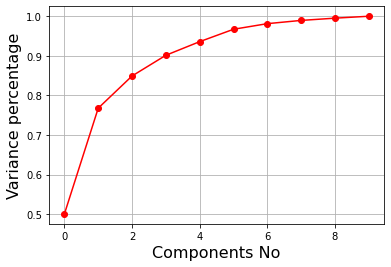

In [220]:
# checking PCA Components using screeplot
x_pca = pca.fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

In [221]:
pca_new=PCA(n_components=6)
comp=pca_new.fit_transform(x)

In [222]:
pca_comp=pd.DataFrame(comp)
pca_comp

,0,1,2,3,4,5
0,1.494391,-1.834886,-1.598528,-0.575814,-0.493092,-1.695974
1,1.193392,0.263391,1.404589,-0.417716,0.211024,0.700411
2,1.444560,-1.002986,0.147027,1.304005,0.229908,0.638245
3,-2.326928,0.462758,-0.112449,-0.124326,0.018014,-0.164096
4,2.362029,3.704288,-0.734347,-0.161233,0.647933,-0.177026
...,...,...,...,...,...,...
879,-2.787085,1.279431,-0.066161,-0.570892,0.035269,0.799597
880,2.065750,-2.602940,-1.066495,-0.919506,-0.087394,-0.235451
881,1.476143,-1.124289,0.206624,1.301527,0.178662,0.488268
882,1.208159,0.206673,1.432455,-0.418875,0.187063,0.630287


In [223]:
pca_comp

,0,1,2,3,4,5
0,1.494391,-1.834886,-1.598528,-0.575814,-0.493092,-1.695974
1,1.193392,0.263391,1.404589,-0.417716,0.211024,0.700411
2,1.444560,-1.002986,0.147027,1.304005,0.229908,0.638245
3,-2.326928,0.462758,-0.112449,-0.124326,0.018014,-0.164096
4,2.362029,3.704288,-0.734347,-0.161233,0.647933,-0.177026
...,...,...,...,...,...,...
879,-2.787085,1.279431,-0.066161,-0.570892,0.035269,0.799597
880,2.065750,-2.602940,-1.066495,-0.919506,-0.087394,-0.235451
881,1.476143,-1.124289,0.206624,1.301527,0.178662,0.488268
882,1.208159,0.206673,1.432455,-0.418875,0.187063,0.630287


# Model Building

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [225]:
lr=LinearRegression()

In [226]:
# To Choose Best Random State.

In [227]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(pca_comp,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State:",i)
        print("The Model Training score is:",r2_score(y_train,pred_train)*100)
        print("The Model Test score is :",r2_score(y_test,pred_test)*100)
        
    

At Random State: 0
The Model Training score is: 98.28228869698846
The Model Test score is : 98.26388422384126
At Random State: 4
The Model Training score is: 98.28199126425493
The Model Test score is : 98.27528989491252
At Random State: 5
The Model Training score is: 98.26077907262435
The Model Test score is : 98.33133426627822
At Random State: 8
The Model Training score is: 98.27579098348005
The Model Test score is : 98.31029954916303
At Random State: 12
The Model Training score is: 98.2723813675818
The Model Test score is : 98.28672589398847
At Random State: 18
The Model Training score is: 98.27085707591573
The Model Test score is : 98.32737206629076
At Random State: 22
The Model Training score is: 98.28311225150247
The Model Test score is : 98.27635283205528
At Random State: 25
The Model Training score is: 98.27286150916007
The Model Test score is : 98.29987981602558
At Random State: 26
The Model Training score is: 98.28509518111616
The Model Test score is : 98.27743373669007
At Ran

In [228]:
# we have choose ,Random State =134 and split the model

In [229]:
x_train,x_test,y_train,y_test=train_test_split(pca_comp,y,test_size=0.25,random_state=134)
lr.fit(x_train,y_train)

LinearRegression()

In [230]:
pred_test=lr.predict(x_test)

In [231]:
print(r2_score(y_test,pred_test)*100)

98.31392564463177


In [232]:
print("Mean Squared Error is:",mean_squared_error(y_test,pred_test)*100)
print("Mean absolute Error is:",mean_absolute_error(y_test,pred_test)*100)

Mean Squared Error is: 1.6283578709113486
Mean absolute Error is: 9.860886423382201


# Cross-Validation

In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
for j in range(2,10):
    cvs=cross_val_score(lr,pca_comp,y,cv=j)
    print(cvs*100)
    cvm=cvs.mean()
    print("At Cross Fold:",j)
    print("The Cross Validation score is :",cvm*100)
    print("The Model Score is: ",r2_score(y_test,pred_test))
    print("The Difference between the cross Valid score and the Model score is :",(cvm*100-r2_score(y_test,pred_test)*100))

[98.03033966 98.46355857]
At Cross Fold: 2
The Cross Validation score is : 98.24694911700324
The Model Score is:  0.9831392564463176
The Difference between the cross Valid score and the Model score is : -0.06697652762852613
[97.9246945  98.25518076 98.51694825]
At Cross Fold: 3
The Cross Validation score is : 98.2322745034785
The Model Score is:  0.9831392564463176
The Difference between the cross Valid score and the Model score is : -0.08165114115327299
[97.72961994 98.32542449 98.49217143 98.43008385]
At Cross Fold: 4
The Cross Validation score is : 98.24432492834642
The Model Score is:  0.9831392564463176
The Difference between the cross Valid score and the Model score is : -0.06960071628535047
[98.29081487 97.72118365 98.15195927 98.57931188 98.42853151]
At Cross Fold: 5
The Cross Validation score is : 98.23436023535808
The Model Score is:  0.9831392564463176
The Difference between the cross Valid score and the Model score is : -0.07956540927368394
[98.29657304 97.49999218 98.27459

In [235]:
# At Cross Fold,we choose cv=3 and build the model with same cv.

# Training the Model with other algorithms.

In [236]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvscore=cross_val_score(algorithm,pca_comp,y,cv=3)
    cvmean=cvscore.mean()
    print("The Model Name is :",algorithm)
    print("The Model Training score is:",r2_score(y_train,pred_algo_train)*100)
    print("The Model Test score is :",r2_score(y_test,pred_algo_test)*100)
    print("The Cross Validation score of the Model is:",cvmean*100)
    print("The Difference between the cross validation and the model score is:",(r2_score(y_test,pred_algo_test)*100-cvmean*100))
    print("The Mean squared error is :",mean_squared_error(y_test,pred_algo_test))
    print("The Mean absolute Error is :",mean_absolute_error(y_test,pred_algo_test))

# Training the Model with decision tree regressor

In [237]:
from sklearn.tree import DecisionTreeRegressor

In [238]:
dtr=DecisionTreeRegressor()

In [239]:
model_selection(dtr,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor()
The Model Training score is: 100.0
The Model Test score is : 97.69832481697958
The Cross Validation score of the Model is: 96.33425807308947
The Difference between the cross validation and the model score is: 1.3640667438901062
The Mean squared error is : 0.022228858938632554
The Mean absolute Error is : 0.07916866313758061


# Using GridSearchCV for decision tree

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
parameters={'criterion' : ["squared_error", "friedman_mse", "absolute_error"],'max_depth':[2,3,5],'min_samples_split':[2,3,4]}
           

In [242]:
grd_dtr=GridSearchCV(estimator=dtr,param_grid=parameters)
grd_dtr.fit(x_train,y_train)
print(grd_dtr.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_split': 4}


In [243]:
dtr_hyper=DecisionTreeRegressor(criterion='friedman_mse',max_depth= 5, min_samples_split= 2)
dtr_hyper.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [244]:
model_selection(dtr_hyper,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
The Model Training score is: 96.9106377599227
The Model Test score is : 95.07888878603062
The Cross Validation score of the Model is: 93.74038785162098
The Difference between the cross validation and the model score is: 1.3385009344096375
The Mean squared error is : 0.04752655274889734
The Mean absolute Error is : 0.1656486763427612


In [245]:
#Observations:
#Decision Tree model after hypertuning,r2_score is decreased from the normal.

# Training the Model with KNeighborRegressor

In [246]:
from sklearn.neighbors import KNeighborsRegressor

In [247]:
knr=KNeighborsRegressor()

In [248]:
model_selection(knr,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor()
The Model Training score is: 98.14507061147005
The Model Test score is : 97.28723144844565
The Cross Validation score of the Model is: 97.4611463678725
The Difference between the cross validation and the model score is: -0.17391491942684922
The Mean squared error is : 0.026199070099251657
The Mean absolute Error is : 0.08523446074640045


# KNeighborsregressor using GridSearch CV

In [249]:
parameters={'n_neighbors':[2,10,5],'weights' : ['uniform', 'distance'],'leaf_size':[10,50,30]}

In [250]:
grd_knr=GridSearchCV(knr,param_grid=parameters)
grd_knr.fit(x_train,y_train)
print(grd_knr.best_params_)

{'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}


In [251]:
knr_hyper=KNeighborsRegressor(leaf_size= 10, n_neighbors= 5, weights= 'distance')

In [252]:
model_selection(knr_hyper,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor(leaf_size=10, weights='distance')
The Model Training score is: 100.0
The Model Test score is : 97.67569656581351
The Cross Validation score of the Model is: 97.814345476649
The Difference between the cross validation and the model score is: -0.13864891083548514
The Mean squared error is : 0.022447395510130162
The Mean absolute Error is : 0.07211048432361639


In [253]:
# We Can slight improvement by using Grd Search CV for KNregressor.

In [254]:
from sklearn.svm import SVR

In [255]:
svr=SVR()

In [256]:
model_selection(svr,x_train,x_test,y_train,y_test)

The Model Name is : SVR()
The Model Training score is: 99.57956866286635
The Model Test score is : 99.46294416426542
The Cross Validation score of the Model is: 99.3583293380584
The Difference between the cross validation and the model score is: 0.10461482620702611
The Mean squared error is : 0.005186717266963515
The Mean absolute Error is : 0.05072100454863202


In [257]:
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor

In [258]:
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()

In [259]:
model_selection(sgd,x_train,x_test,y_train,y_test)
model_selection(lasso,x_train,x_test,y_train,y_test)
model_selection(ridge,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor()
The Model Training score is: 98.25169507743034
The Model Test score is : 98.28730883980987
The Cross Validation score of the Model is: 98.2018233631055
The Difference between the cross validation and the model score is: 0.08548547670436335
The Mean squared error is : 0.01654063548417353
The Mean absolute Error is : 0.10114763360209325
The Model Name is : Lasso()
The Model Training score is: 35.45461220530517
The Model Test score is : 32.261318916920544
The Cross Validation score of the Model is: 32.008556907775024
The Difference between the cross validation and the model score is: 0.2527620091455205
The Mean squared error is : 0.6541989928000307
The Mean absolute Error is : 0.6669873216702812
The Model Name is : Ridge()
The Model Training score is: 98.27586964810008
The Model Test score is : 98.31311197304804
The Cross Validation score of the Model is: 98.23192388026781
The Difference between the cross validation and the model score is: 0.081188092780

In [260]:
# Training the Models with Ensemble methods 
from sklearn.ensemble import RandomForestRegressor              #randomforestRegressor
from sklearn.ensemble import AdaBoostRegressor                  #AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor          #GradientBoostRegressor
from xgboost import XGBRegressor                                # ExtraGradientBoostRegressor

In [261]:
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gbt=GradientBoostingRegressor()
xgb=XGBRegressor()

In [262]:
model_selection(rf,x_train,x_test,y_train,y_test)
model_selection(ada,x_train,x_test,y_train,y_test)
model_selection(gbt,x_train,x_test,y_train,y_test)
model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is : RandomForestRegressor()
The Model Training score is: 99.79225122444686
The Model Test score is : 97.99906735393995
The Cross Validation score of the Model is: 97.75481592068479
The Difference between the cross validation and the model score is: 0.2442514332551582
The Mean squared error is : 0.019324381590892337
The Mean absolute Error is : 0.06621660534406859
The Model Name is : AdaBoostRegressor()
The Model Training score is: 95.28477370247987
The Model Test score is : 93.00006700875142
The Cross Validation score of the Model is: 94.26952307584743
The Difference between the cross validation and the model score is: -1.2694560670960158
The Mean squared error is : 0.06760316320487701
The Mean absolute Error is : 0.20633870125940568
The Model Name is : GradientBoostingRegressor()
The Model Training score is: 99.67487068029482
The Model Test score is : 98.39912771789443
The Cross Validation score of the Model is: 98.20353108543104
The Difference between the cross valida

In [263]:
# Out of all the models,SGD regressor is giving the Best score,as the difference between them is very less

#  Hyper tuning for SGD regressor       

In [264]:
parameters={'alpha':[0.0001,0.1,0.001],'max_iter':[50,100]}

In [265]:
grd_sgd=GridSearchCV(sgd,param_grid=parameters)
grd_sgd.fit(x_train,y_train)
print(grd_sgd.best_params_)

{'alpha': 0.0001, 'max_iter': 100}


In [266]:
sgd_hyper=SGDRegressor(alpha= 0.001, max_iter= 50)


In [267]:
model_selection(sgd_hyper,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor(alpha=0.001, max_iter=50)
The Model Training score is: 98.25150191237145
The Model Test score is : 98.282657690891
The Cross Validation score of the Model is: 98.19272712404351
The Difference between the cross validation and the model score is: 0.08993056684748524
The Mean squared error is : 0.016585554825522406
The Mean absolute Error is : 0.10086242033762745


In [268]:
# Slight changes only happened in SGDRegressor hyper tuning .

# HyperTuning for Random_forest using gridsearchCV

In [269]:
parameters={'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,3,5],'max_features' : ["auto", "sqrt", "log2"]}

In [270]:
grd_ran=GridSearchCV(rf,param_grid=parameters)
grd_ran.fit(x_train,y_train)
print(grd_ran.best_params_)

{'criterion': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}


In [278]:
rf_hyper=RandomForestRegressor(criterion='squared_error',max_features= 'auto',min_samples_leaf= 1,min_samples_split=3)

In [279]:
model_selection(rf_hyper,x_train,x_test,y_train,y_test)

The Model Name is : RandomForestRegressor(min_samples_split=3)
The Model Training score is: 99.78404313847561
The Model Test score is : 98.11625271434387
The Cross Validation score of the Model is: 97.7439343714931
The Difference between the cross validation and the model score is: 0.37231834285077525
The Mean squared error is : 0.01819264203645467
The Mean absolute Error is : 0.0644669836853412


In [280]:
# Slight Improvement only happened in the R2_score.

In [281]:
#Tried Hypertuning different Models,saving RIDGE as the best_model as the R2 score and cross validation score is only 0.08.

# Model Saving.

In [282]:
import pickle
filename='global_capacity_mw.pkl'
pickle.dump(ridge,open(filename,'wb'))

In [283]:
loaded_model=pickle.load(open('global_capacity_mw.pkl','rb'))
print(loaded_model.score(x_test,y_test)*100)

98.31311197304804


# conclusion

In [284]:
a=np.array(y_test)
prediction=loaded_model.predict(x_test)
b=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'prediction':b})
conclusion

,Actual,prediction
0,-0.328076,-0.330992
1,0.646487,0.703829
2,0.902910,0.912955
3,-0.121763,-0.168314
4,1.820980,1.836036
...,...,...
216,-0.172021,-0.226110
217,0.494751,0.432656
218,-1.364989,-1.506950
219,-0.148601,-0.042944


# classification pblm for primary_fuel.

In [285]:
df=pd.read_csv('database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [286]:
# Removing Unnecessary columns from the Dataset.
# After Analyzing in the above pblm,the columns are removed
df.drop(columns=['country','country_long','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [287]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
df.drop(columns=['owner','source','url','wepp_id'],axis=1,inplace=True)

In [289]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
# Checking Null Values.

In [291]:
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
commissioning_year          380
geolocation_source           19
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [292]:
df.drop(columns=['generation_gwh_2013','estimated_generation_gwh'],axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
df.drop(columns='generation_gwh_2019',axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Treating NULL Values.

In [294]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [295]:
df1=df.fillna(0)  # Replacing the values with Zero ans saving the same.
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,24.7663,74.6090,Coal,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,21.9038,69.3732,Wind,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,0.0,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,15.2758,75.5811,Wind,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,24.3500,73.7477,Coal,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [296]:
df1.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [297]:
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,24.7663,74.6090,Coal,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,21.9038,69.3732,Wind,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,0.0,Industry About,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,15.2758,75.5811,Wind,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,24.3500,73.7477,Coal,0.0,WRI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [298]:
# Encoding the categorical columns.

In [299]:
from sklearn.preprocessing import LabelEncoder

In [300]:
le=LabelEncoder()

In [301]:
le_fuel=le.fit_transform(df1['primary_fuel'])
le_fuel

array([6, 1, 7, 2, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 2, 1, 1, 0, 0, 0,
       2, 1, 1, 6, 6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 1, 0, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 3,
       3, 7, 7, 1, 0, 0, 5, 1, 1, 1, 3, 1, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 7, 5, 2, 1, 3, 5,
       1, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6,
       6, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 6,
       6, 7, 6, 1, 1, 2, 4, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       5, 3, 3, 2, 0, 5, 3, 3, 3, 0, 3, 1, 1, 1, 6, 2, 7, 6, 7, 6, 6, 6,
       6, 6, 6, 3, 3, 7, 2, 7, 7, 7, 7, 1, 2, 7, 2, 7, 1, 2, 3, 2, 2, 3,
       1, 3, 3, 2, 1, 7, 3, 3, 3, 1, 1, 3, 7, 1, 2, 1, 1, 2, 1, 3, 7, 6,
       6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 7,
       7, 7, 7, 7, 1, 7, 6, 1, 2, 3, 3, 1, 7, 1, 1, 3, 1, 1, 7, 6, 6, 3,
       0, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 6, 6, 7,

In [302]:
df1['primary_fuel']=le_fuel

In [303]:
df1['geolocation_source']=df1['geolocation_source'].astype('str')

In [304]:
le_gls=le.fit_transform(df1['geolocation_source'])
le_gls

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 1, 1, 1,
       2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 2, 1, 1, 3, 1, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,

In [305]:
df1['geolocation_source']=le_gls

In [306]:
df1['generation_data_source']=df1['generation_data_source'].astype('str')

In [307]:
le_gen_source=le.fit_transform(df1['generation_data_source'])
le_gen_source

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [308]:
df1['generation_data_source']=le_gen_source

In [309]:
# After Encoding,rechecking the dataset.

In [310]:
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,24.7663,74.6090,1,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,21.9038,69.3732,7,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,23.8712,91.3602,2,2004.0,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,21.9603,82.4091,1,2015.0,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,3,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,1
903,3.0,12.8932,78.1654,6,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,15.2758,75.5811,7,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,24.3500,73.7477,1,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


# coefficient coorelation

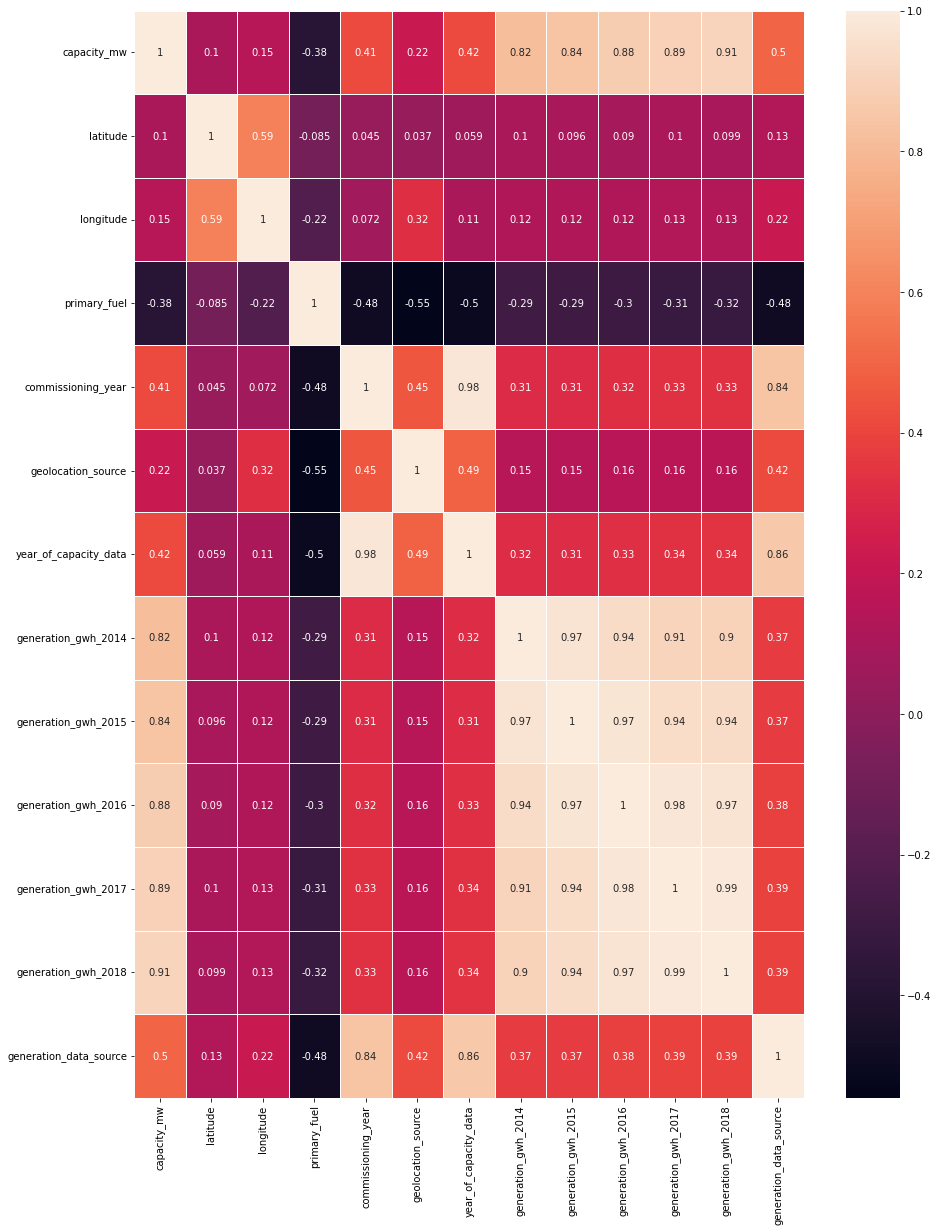

In [311]:
corr1=df1.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr1,annot=True,linewidths=0.5)
plt.show()

In [312]:
corr1['primary_fuel'].sort_values(ascending=True)

geolocation_source       -0.545625
year_of_capacity_data    -0.500558
generation_data_source   -0.482339
commissioning_year       -0.481665
capacity_mw              -0.380395
generation_gwh_2018      -0.315301
generation_gwh_2017      -0.313935
generation_gwh_2016      -0.304119
generation_gwh_2015      -0.291273
generation_gwh_2014      -0.285822
longitude                -0.216738
latitude                 -0.085174
primary_fuel              1.000000
Name: primary_fuel, dtype: float64

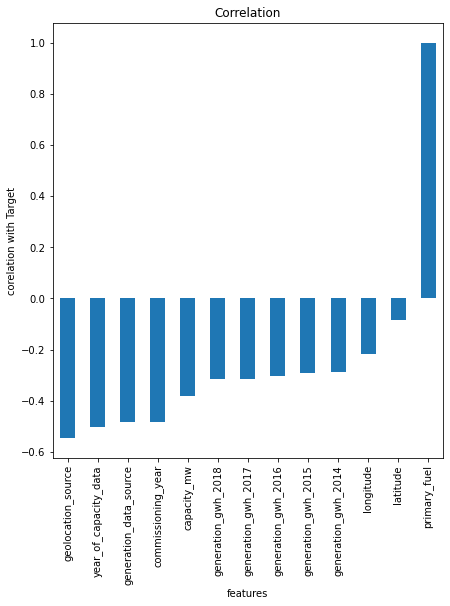

In [313]:
plt.figure(figsize=(7,8))
corr1['primary_fuel'].sort_values(ascending=True).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()

In [314]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [315]:
x=df1.drop(columns='primary_fuel',axis=1)
x

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,2011.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,24.7663,74.6090,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,21.9038,69.3732,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,23.8712,91.3602,2004.0,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,21.9603,82.4091,2015.0,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,3,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,1
903,3.0,12.8932,78.1654,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,15.2758,75.5811,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,24.3500,73.7477,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [316]:
y=df1['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [317]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,54.854670,capacity_mw
1,13.702912,latitude
2,8.271897,longitude
3,260.497042,commissioning_year
4,432.263637,geolocation_source
5,311.691771,year_of_capacity_data
6,29.304565,generation_gwh_2014
7,30.675206,generation_gwh_2015
8,34.211383,generation_gwh_2016
9,37.070539,generation_gwh_2017


In [318]:
best_score.sort_values('score',ascending=False)

,score,columnname
4,432.263637,geolocation_source
5,311.691771,year_of_capacity_data
3,260.497042,commissioning_year
11,124.313778,generation_data_source
0,54.854670,capacity_mw
10,37.245242,generation_gwh_2018
9,37.070539,generation_gwh_2017
8,34.211383,generation_gwh_2016
7,30.675206,generation_gwh_2015
6,29.304565,generation_gwh_2014


In [319]:
# Removing the columns,latitude and longitude from the dataset after KBEst and corelation values.

In [320]:
df1.drop(columns=['latitude','longitude'],axis=1,inplace=True)
df1

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6,2011.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,1,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,7,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,2,2004.0,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,1,2015.0,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1,2016.0,3,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,1
903,3.0,6,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,7,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,1,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [321]:
x=df1.drop(columns='primary_fuel',axis=1)
x

,capacity_mw,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,2011.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,2004.0,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,2015.0,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,2016.0,3,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,1
903,3.0,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [322]:
y=df1['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

# outliers

capacity_mw                  AxesSubplot(0.125,0.772143;0.352273x0.107857)
primary_fuel              AxesSubplot(0.547727,0.772143;0.352273x0.107857)
commissioning_year           AxesSubplot(0.125,0.642714;0.352273x0.107857)
geolocation_source        AxesSubplot(0.547727,0.642714;0.352273x0.107857)
year_of_capacity_data        AxesSubplot(0.125,0.513286;0.352273x0.107857)
generation_gwh_2014       AxesSubplot(0.547727,0.513286;0.352273x0.107857)
generation_gwh_2015          AxesSubplot(0.125,0.383857;0.352273x0.107857)
generation_gwh_2016       AxesSubplot(0.547727,0.383857;0.352273x0.107857)
generation_gwh_2017          AxesSubplot(0.125,0.254429;0.352273x0.107857)
generation_gwh_2018       AxesSubplot(0.547727,0.254429;0.352273x0.107857)
generation_data_source          AxesSubplot(0.125,0.125;0.352273x0.107857)
dtype: object

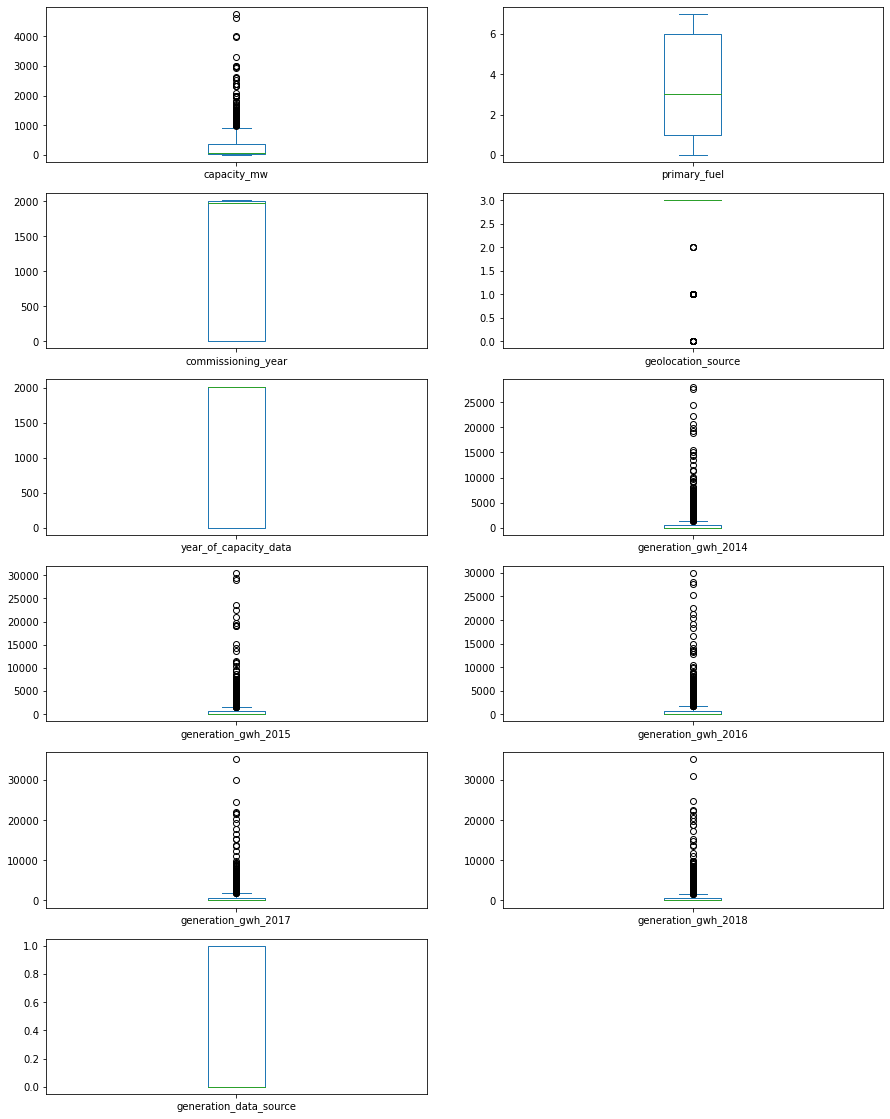

In [323]:
df1.plot(kind='box',subplots=True,layout=(6,2),figsize=(15,20))

In [324]:
#Using Z score method to remove the outliers.

In [325]:
#Using Z-Score method.
from scipy.stats import zscore

In [326]:
z=np.abs(zscore(df1))
z

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.548908,1.225688,0.863195,0.858935,1.156559,0.364890,0.363995,0.377363,0.388001,0.389703,0.990126
1,0.386977,0.967877,1.177540,0.422404,1.156559,0.364890,0.363995,0.377363,0.388001,0.389703,0.990126
2,0.486679,1.664401,1.177540,0.422404,1.156559,0.364890,0.363995,0.377363,0.388001,0.389703,0.990126
3,0.324240,0.529164,0.856091,0.422404,0.864634,0.153641,0.092155,0.094238,0.179624,0.199729,1.009973
4,2.498942,0.967877,0.867254,0.422404,0.864634,0.673095,1.542151,1.617605,1.302680,1.818441,1.009973
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.967877,0.868269,0.422404,0.864634,0.364890,0.363674,0.302716,0.116328,0.181448,1.009973
903,0.548060,1.225688,1.177540,2.140275,1.156559,0.364890,0.363995,0.377363,0.388001,0.389703,0.990126
904,0.509909,1.664401,1.177540,0.422404,1.156559,0.364890,0.363995,0.377363,0.388001,0.389703,0.990126
905,0.417498,0.967877,1.177540,0.422404,1.156559,0.364890,0.363995,0.377363,0.388001,0.389703,0.990126


In [327]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6,2011.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,1,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,7,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,2,2004.0,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,1,2015.0,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1,2016.0,3,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,1
903,3.0,6,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,7,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,1,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [328]:
Data_loss=(907-863)/907*100
Data_loss

4.851157662624035

# Skewness check

In [329]:
x1=df1_new.drop(columns='primary_fuel',axis=1)
x1

,capacity_mw,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,2011.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,98.0,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,39.2,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,135.0,2004.0,3,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,1
4,1800.0,2015.0,3,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,1
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,2016.0,3,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,1
903,3.0,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
904,25.5,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
905,80.0,0.0,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [330]:
y=df1_new['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 863, dtype: int32

In [331]:
x1.skew()

capacity_mw               2.020767
commissioning_year       -0.311962
geolocation_source       -2.076049
year_of_capacity_data    -0.293285
generation_gwh_2014       2.817839
generation_gwh_2015       2.647716
generation_gwh_2016       2.589481
generation_gwh_2017       2.503866
generation_gwh_2018       2.555774
generation_data_source    0.034828
dtype: float64

In [332]:
from sklearn.preprocessing import PowerTransformer

In [333]:
pt=PowerTransformer()
pwr=pt.fit_transform(x1)
x1_new=pd.DataFrame(data=pwr,columns=x1.columns)
x1_new

,capacity_mw,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,-1.687472,0.859074,-2.307925,-1.157045,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
1,0.228641,-1.168064,0.407676,-1.157045,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
2,-0.273149,-1.168064,0.407676,-1.157045,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
3,0.402892,0.857642,0.407676,0.864271,1.217787,1.209552,1.181809,1.114391,1.083835,1.017535
4,1.772798,0.859890,0.407676,0.864271,1.413528,1.463348,1.455664,1.426039,1.456076,1.017535
...,...,...,...,...,...,...,...,...,...,...
858,1.712189,0.860094,0.407676,0.864271,-0.802999,-0.501330,0.938036,1.159769,1.100347,1.017535
859,-1.607968,-1.168064,-2.457549,-1.157045,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
860,-0.508822,-1.168064,0.407676,-1.157045,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
861,0.117842,-1.168064,0.407676,-1.157045,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767


In [334]:
x1_new.skew() # After removing skewness,rechecking it

capacity_mw               0.013674
commissioning_year       -0.312475
geolocation_source       -2.049090
year_of_capacity_data    -0.293285
generation_gwh_2014       0.483407
generation_gwh_2015       0.400508
generation_gwh_2016       0.360034
generation_gwh_2017       0.349105
generation_gwh_2018       0.330355
generation_data_source    0.034828
dtype: float64

In [335]:
x1_new.shape

(863, 10)

In [336]:
y.shape

(863,)

# Multicollinearity using VIF

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [338]:
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(x1_new,i) for i in range(x1_new.shape[1])]
vif2['columns']=x1_new.columns
vif2

,VIF,columns
0,3.284421,capacity_mw
1,54.689505,commissioning_year
2,1.516859,geolocation_source
3,59.498744,year_of_capacity_data
4,7.207251,generation_gwh_2014
5,15.176952,generation_gwh_2015
6,21.861053,generation_gwh_2016
7,32.836486,generation_gwh_2017
8,24.996340,generation_gwh_2018
9,8.821993,generation_data_source


In [339]:
# Since the VIF2 values greater than 10,we are removing the column from x1_new to check the VIF again.

In [340]:
x1_new.drop(columns='year_of_capacity_data',axis=1,inplace=True)


In [341]:
x1_new

,capacity_mw,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,-1.687472,0.859074,-2.307925,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
1,0.228641,-1.168064,0.407676,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
2,-0.273149,-1.168064,0.407676,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
3,0.402892,0.857642,0.407676,1.217787,1.209552,1.181809,1.114391,1.083835,1.017535
4,1.772798,0.859890,0.407676,1.413528,1.463348,1.455664,1.426039,1.456076,1.017535
...,...,...,...,...,...,...,...,...,...
858,1.712189,0.860094,0.407676,-0.802999,-0.501330,0.938036,1.159769,1.100347,1.017535
859,-1.607968,-1.168064,-2.457549,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
860,-0.508822,-1.168064,0.407676,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767
861,0.117842,-1.168064,0.407676,-0.802999,-0.845126,-0.863821,-0.868998,-0.874882,-0.982767


In [342]:
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(x1_new,i) for i in range(x1_new.shape[1])]
vif2['columns']=x1_new.columns
vif2

,VIF,columns
0,3.195405,capacity_mw
1,3.766027,commissioning_year
2,1.425295,geolocation_source
3,7.204573,generation_gwh_2014
4,15.172900,generation_gwh_2015
5,21.857176,generation_gwh_2016
6,32.834847,generation_gwh_2017
7,24.995909,generation_gwh_2018
8,8.538555,generation_data_source


In [343]:
# still the VIF values is high,Using PCA techniques for choosing the best performance.

# PCA

In [344]:
from sklearn.decomposition import PCA

In [345]:
pca=PCA()

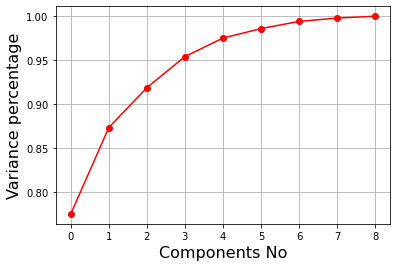

In [346]:
x1_pca = pca.fit_transform(x1_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

In [347]:
pca_new=PCA(n_components=6)
comp=pca_new.fit_transform(x1_new)
comp

array([[-2.54758527e+00,  1.66048300e+00,  1.86724207e+00,
         4.44510073e-01,  1.64800759e-01,  7.21455106e-01],
       [-2.10072790e+00, -8.72032061e-01, -9.63219773e-01,
         1.73749926e-01,  1.84413139e-01,  4.99667977e-02],
       [-2.25893099e+00, -7.82792073e-01, -6.79895005e-01,
        -1.34290083e-01,  2.23001535e-03, -2.79770028e-02],
       ...,
       [-2.33323368e+00, -7.40879044e-01, -5.46826863e-01,
        -2.78966144e-01, -8.33352879e-02, -6.45845918e-02],
       [-2.13566058e+00, -8.52327061e-01, -9.00659090e-01,
         1.05731894e-01,  1.44185450e-01,  3.27560984e-02],
       [-2.40795345e+00, -6.98730742e-01, -4.13011765e-01,
        -4.24454322e-01, -1.69380898e-01, -1.01397672e-01]])

In [348]:
x2=pd.DataFrame(comp)
x2

,0,1,2,3,4,5
0,-2.547585,1.660483,1.867242,0.444510,0.164801,0.721455
1,-2.100728,-0.872032,-0.963220,0.173750,0.184413,0.049967
2,-2.258931,-0.782792,-0.679895,-0.134290,0.002230,-0.027977
3,2.912700,0.289061,0.208870,-0.481359,-0.096701,-0.042384
4,3.851723,0.244693,-0.668792,0.164572,0.171950,0.269637
...,...,...,...,...,...,...
858,1.954743,-0.574739,-0.303813,1.923504,-1.023911,0.003771
859,-3.186739,2.081121,0.268066,-0.036444,-0.107967,-0.080631
860,-2.333234,-0.740879,-0.546827,-0.278966,-0.083335,-0.064585
861,-2.135661,-0.852327,-0.900659,0.105732,0.144185,0.032756


# Model Building

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [350]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("The Model Performs well")
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

The Model Performs well
At Random State 5
The Training score is: 67.85162287480681
The Test Score is : 68.05555555555556
The Model Performs well
At Random State 7
The Training score is: 68.46986089644514
The Test Score is : 68.05555555555556
The Model Performs well
At Random State 24
The Training score is: 67.69706336939721
The Test Score is : 68.05555555555556
The Model Performs well
At Random State 29
The Training score is: 68.31530139103555
The Test Score is : 67.5925925925926
The Model Performs well
At Random State 32
The Training score is: 68.46986089644514
The Test Score is : 67.5925925925926
The Model Performs well
At Random State 54
The Training score is: 67.23338485316846
The Test Score is : 67.12962962962963
The Model Performs well
At Random State 60
The Training score is: 67.54250386398763
The Test Score is : 68.05555555555556
The Model Performs well
At Random State 66
The Training score is: 68.16074188562597
The Test Score is : 67.5925925925926
The Model Performs well
At Ra

In [351]:
# Choosing random_state=947

In [352]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.25,random_state=947)
    

In [353]:
lr.fit(x_train,y_train)

LogisticRegression()

In [354]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [355]:
print(accuracy_score(y_test,pred_test)*100)
print("\n\n",classification_report(y_test,pred_test))
print("\n\n",confusion_matrix(y_test,pred_test))


68.05555555555556


               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.55      0.60      0.58        53
           2       0.50      0.12      0.19        17
           3       0.84      0.84      0.84        74
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        27
           7       0.46      0.86      0.60        28

    accuracy                           0.68       216
   macro avg       0.42      0.43      0.40       216
weighted avg       0.65      0.68      0.65       216



 [[ 0  0  0  0  0  0  0 14]
 [ 0 32  1  7  0  0  0 13]
 [ 0  9  2  4  0  1  0  1]
 [ 0 12  0 62  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  4  0  0  0  0  0 24]]


# Cross_validation.

In [356]:
from sklearn.model_selection import cross_val_score

In [357]:
for j in range(2,10):
    lss_score=cross_val_score(lr,x2,y,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)

[0.66898148 0.6774942 ]
At CV Fold,: 2
Cross Valid Score is: 67.32378405087222
Accuracy Score is : 68.05555555555556
[0.67013889 0.67361111 0.67247387]
At CV Fold,: 3
Cross Valid Score is: 67.20746225319397
Accuracy Score is : 68.05555555555556
[0.68055556 0.66666667 0.66666667 0.67906977]
At CV Fold,: 4
Cross Valid Score is: 67.32396640826873
Accuracy Score is : 68.05555555555556
[0.66473988 0.65317919 0.68208092 0.68604651 0.6744186 ]
At CV Fold,: 5
Cross Valid Score is: 67.20930232558139
Accuracy Score is : 68.05555555555556
[0.67361111 0.68055556 0.65972222 0.66666667 0.66666667 0.67132867]
At CV Fold,: 6
Cross Valid Score is: 66.97584822584822
Accuracy Score is : 68.05555555555556
[0.64516129 0.7016129  0.65853659 0.69105691 0.65853659 0.68292683
 0.68292683]
At CV Fold,: 7
Cross Valid Score is: 67.43939904836836
Accuracy Score is : 68.05555555555556
[0.64814815 0.7037037  0.66666667 0.65740741 0.65740741 0.67592593
 0.7037037  0.6728972 ]
At CV Fold,: 8
Cross Valid Score is: 67.3

In [358]:
# Observation:
# Choosing Cross Fold,cv=4 where Cross Valid Score and Accuracy Score is having less difference.

In [359]:
print("The Cross Valid Score is :",lsc_score*100)
print("The Training Score for lr is ",accuracy_score(y_train,pred_train)*100)
print("The Accuracy Score for lr is :",accuracy_score(y_test,pred_test)*100)
print ("The Difference between the Score is ",(lsc_score*100-accuracy_score(y_test,pred_test)*100))

The Cross Valid Score is : 67.32577972709552
The Training Score for lr is  68.31530139103555
The Accuracy Score for lr is : 68.05555555555556
The Difference between the Score is  -0.7297758284600349


# Training the Model with different algorithms.

In [360]:
# defining Function
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,x2,y,cv=4)
    cvc=cvs.mean()
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",(cvc*100-accuracy_score(y_test,pred_algo_test)*100))
    

In [361]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [362]:
dtc=DecisionTreeClassifier()

In [363]:
model_selection(dtc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 94.74497681607419
The Accuracy score of the Model Test Data: 69.44444444444444
The Cross Valid Score of the Algorithm: 65.58247200689061
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.55      0.57      0.56        53
           2       0.27      0.18      0.21        17
           3       0.83      0.78      0.81        74
           4       0.00      0.00      0.00         1
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00        27
           7       0.75      0.75      0.75        28

    accuracy                           0.69       216
   macro avg       0.53      0.56      0.54       216
weighted avg       0.70      0.69      0.69       216

The Confusion Matrix is : [[10  1  0  0  0  0  0  3]
 [ 2 30  4  9  2  2  0  4]
 [ 0 10  3  3  1  0  0  0]
 [ 0 13  3 58 

In [364]:
# Training the Model with SVM Classifier

In [365]:
from sklearn.svm import  SVC

In [366]:
svc=SVC()

In [367]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 68.77897990726429
The Accuracy score of the Model Test Data: 68.98148148148148
The Cross Valid Score of the Algorithm: 67.55598621877692
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.61      0.53      0.57        53
           2       0.60      0.18      0.27        17
           3       0.82      0.86      0.84        74
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        27
           7       0.45      0.96      0.61        28

    accuracy                           0.69       216
   macro avg       0.43      0.44      0.41       216
weighted avg       0.66      0.69      0.65       216

The Confusion Matrix is : [[ 0  0  0  0  0  0  0 14]
 [ 0 28  1  9  0  0  0 15]
 [ 0  6  3  5  0  0  0  3]
 [ 0 10  0 64 

In [368]:
# Training the Model with K Neighbor Classifier.

In [369]:
from sklearn.neighbors import KNeighborsClassifier

In [370]:
knc=KNeighborsClassifier()

In [371]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 76.66151468315302
The Accuracy score of the Model Test Data: 69.9074074074074
The Cross Valid Score of the Algorithm: 66.51216623600345
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.56      0.57      0.56        53
           2       0.27      0.18      0.21        17
           3       0.79      0.82      0.81        74
           4       0.00      0.00      0.00         1
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00        27
           7       0.69      0.71      0.70        28

    accuracy                           0.70       216
   macro avg       0.53      0.55      0.53       216
weighted avg       0.69      0.70      0.69       216

The Confusion Matrix is : [[ 9  1  0  0  0  1  0  3]
 [ 2 30  3 11  0  1  0  6]
 [ 0  8  3  5  0  1  0  0]
 [ 0  9  4 61  

In [372]:
# Training the Model with Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [373]:
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
adac=AdaBoostClassifier()
xgb=XGBClassifier()

In [374]:
model_selection(rfc,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(adac,x_train,x_test,y_train,y_test)

model_selection(xgb,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 94.74497681607419
The Accuracy score of the Model Test Data: 74.07407407407408
The Cross Valid Score of the Algorithm: 69.75613695090439
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.64      0.66      0.65        53
           2       0.42      0.29      0.34        17
           3       0.84      0.84      0.84        74
           4       0.00      0.00      0.00         1
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00        27
           7       0.76      0.79      0.77        28

    accuracy                           0.74       216
   macro avg       0.56      0.58      0.57       216
weighted avg       0.74      0.74      0.74       216

The Confusion Matrix is : [[ 8  3  0  0  0  0  0  3]
 [ 1 35  3  8  1  1  0  4]
 [ 0  7  5  4  1  0  0  0]
 [ 0  8  3 62 

In [375]:
# Since the difference between the cross _val _score and test_score is less in logistic regression,
# will choose the same for hyperTuning.

# Hypertuning 

In [376]:
from sklearn.model_selection import GridSearchCV

In [377]:
parameters={'penalty' :['l1', 'l2', 'elasticnet'],'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[0.1,0.001,0.01]}

In [378]:
grd_log=GridSearchCV(lr,param_grid=parameters)
grd_log.fit(x_train,y_train)
print(grd_log.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [379]:
log_hyper=LogisticRegression(C= 0.1, penalty= 'l2', solver= 'liblinear')


In [380]:
model_selection(log_hyper,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 67.07882534775888
The Accuracy score of the Model Test Data: 66.66666666666666
The Cross Valid Score of the Algorithm: 67.2093023255814
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.53      0.58      0.55        53
           2       0.00      0.00      0.00        17
           3       0.82      0.82      0.82        74
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        27
           7       0.45      0.89      0.60        28

    accuracy                           0.67       216
   macro avg       0.35      0.41      0.37       216
weighted avg       0.60      0.67      0.62       216

The Confusion Matrix is : [[ 0  0  0  0  0  0  0 14]
 [ 0 31  1  7  0  0  0 14]
 [ 0 10  0  5  0  0  0  2]
 [ 0 13  0 61  

In [387]:
#Only slight difference in hyper_tuning,So saving Logistic_hypertuned model 

In [388]:
import pickle                                             # MODEL SAVING.
filename='Global_powerplant.pkl'
pickle.dump(log_hyper,open(filename,'wb'))

In [389]:
loaded_model=pickle.load(open('Global_powerplant.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

66.66666666666666


In [390]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'predicted':predicted})
conclusion

,Actual,predicted
0,0,7
1,3,3
2,6,6
3,1,7
4,3,3
...,...,...
211,1,7
212,7,1
213,7,7
214,6,6
